## 1. Project Overview


### Background
This project was designed to explore various machine learning models and methods with the task of binary classification.  The dataset used is bank marketing dataset taken from <b>UCI Machine Learning repository</b> (see details below).

<b>Project goal:</b>  The goal of this project is to develop a model that predicts the success of the bank's direct marketing campaign (phone call) using the features provided in the dataset.  From a business perpespective, the predictions can be used to better target potential customers who are likely to subscribe (yes/no) into receiving the new product offering, which is a term deposit.

### Citation
This dataset is publicly available for research. The details are described in [Moro et al., 2014]. Please include this citation if you plan to use this database:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, <a href="https://www.sciencedirect.com/science/article/abs/pii/S016792361400061X?via%3Dihub"> http://dx.doi.org/10.1016/j.dss.2014.03.001</a>

Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001 [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

Link to data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric)\
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')\
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)\
4 - education (categorical): 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')\
5 - default: has credit in default? (categorical: 'no','yes','unknown')\
6 - housing: has housing loan? (categorical: 'no','yes','unknown')\
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')\
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')\
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')\
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)\
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)\
14 - previous: number of contacts performed before this campaign and for this client (numeric)\
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)\
17 - cons.price.idx: consumer price index - monthly indicator (numeric)\
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)\
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)\
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## 2. Import Libaries and Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler


import xgboost as xgb
from xgboost import XGBClassifier
from itertools import combinations

import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset
#dataset = pd.read_csv("data/bank-additional-full.csv", sep = ";")
#df = pd.read_csv("data/bank-additional.csv", sep = ";")
df = pd.read_csv("data/bank-additional-full.csv", sep = ";")
pd.set_option('display.max_columns', None)
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [3]:
df.shape

(41188, 21)

In [4]:
# check the data types and number of entries for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Initial data observations
* In the full dataset, there are about 41188 data points, and 21 variables including the target variable `y`
* Although there are no missing values, we already know there are placeholder values which act as missing values

In [5]:
# show summary statistics for each continuous variable
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

#### Notes:
* `duration` has a lot of variance
* the mean and median of `campaign` are very close, but the max value is much higher
* the placeholder `999` has significant influence over `pdays`
* most other variables appear somewhat stable and normally distributed. With exploratory data analysis, we can further validate this

## 3. Data Cleansing and Preparation

In this section we will perform the following tasks:
1. Check missing values and how to deal with them
2. Inspect and learn more about the values in each feature
3. Inspect `999` placeholder values and determine how to handle them:
    * Imputation
    * Drop entries or entire feature
    * Leave them as is

In [6]:
# 3-1:  Check for any na values in the dataset
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

There are no missing values, so we can proceed to next step.

In [7]:
# 3-2: Inspect values in each feature

# Separate features into categorical and numerical groups
numerical_features = []
categorical_features = []

for col in df.columns: 
    if df[col].dtype == 'O':
        categorical_features.append(col)
    else: 
        numerical_features.append(col)

print(f'There are {len(categorical_features)} categorical features: \n', categorical_features)
print('********' * 8)
print(f'There are {len(numerical_features)} numerical variables: \n', numerical_features)

There are 11 categorical features: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
****************************************************************
There are 10 numerical variables: 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [ ]:
# check the number of unique values and its percent distribution
# for each categorical variable
for v in categorical_features:
    print(f'\nUnique values for {v}: {df[v].nunique()}\n',
          str(round(df[v].value_counts(normalize=True)*100, 2)))

#### Categorical value notes:
* `job`: There are 12 unique values for job and is well distributed
    - Less than 1% of values are `unknown`
    - Given the relatively small number of unknowns and much larger number of unique values, these missing values should not have a major influence on our model, so we can leave it alone for now
* `marital`: There are 4 unique values including the `unknown` having a distribution that seems representative
    - Less than 0.2% of values are `unknown`. Given the small distribution, we can safely impute values by applying the known distribution to the unknown values
    - When performing one-hot encoding, this will eliminate one unneccessary variable
* `education`: There are 8 unique values with 4.2% unknown
    - Consider imputing values since given its relatively small percentage
    - We can also apply the known distribution to the unknown values
* `default`: A binary yes/no variable, but also includes just over 20% `unknown`
	- This would be a large value to impute or drop
	- Given the small distribution for `yes` we could safely code all `unknowns` as `no`
	- But, this is also interesting business case, if lack of knowledge of a default actually positively or negatively impacts to a successful marketing call, so we will also leave `unknown` in place for now
* `housing`: A binary yes/no variable, but with a much smaller amount of unknowns, 2.4% 
    - For this variable we can likely safely impute again by applying the known distribution
* `loan`: Another binary yes/no variable with the same % of unknowns
    - We can also impute values
    - With the same amount of unknowns as `housing`, it would be interesting to see if they are the same entries, and if they are missing more data should perhaps be dropped altogether
* `contact`: This variable is interestingly binary as well, between `cellular` and `telephone`, we'll have to pay attention to how it is coded when we transform to dummies
* `month`: It appears this campaign was only for 10 months and heavily focused on the spring and early summer
* `day_of_week`: Calls were only made during the work week and seem very evenly distributed
	- Given the even distribution it will be very interesting to see if one day of the week was more fruitful that others
* `poutcome`: It appears that most people that had been contacted were not part of a previous campaign
	- For those that were previously contacted it will be very interesting to see if it has an influence on future success - especially those that were successfully reached previously
* `y`: The target variable. No missing values here! Also it is good that we have a fairly significant positive rate with 11.27%.

#### Numerical observations: 
We've already previously seen the descriptive statistics of our continuous variables above and with continue to explore them in our EDA.

We do however know that we need to deal with the `999` placeholder for `pdays`

In [8]:
# impute values using function based on the weights of the currently known values
# write a function that takes a variable and returns a randomly selected 
# value if the variable is 'unknown'
def impute_values(variable, values, prob):
    if variable == 'unknown':
        return np.random.choice(values, p=prob)
    else: 
        return variable

#### Handling Marital unknown

In [9]:
# get a unique list values and drop 'unknown'
values = list(set(df.marital.values))
values.remove('unknown')
values

['single', 'divorced', 'married']

In [10]:
# determine the weight of each value in the category 
prob = df[df['marital'] != 'unknown'].marital.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.6064026466867763, 0.2814050793032986, 0.11219227400992507]

In [11]:
# check the current distribution of values
df.marital.value_counts(normalize=True)

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

In [12]:
# impute the values for 'unknown'
df.marital = df.marital.map(lambda x: impute_values(x, values, prob))

In [13]:
# recheck the new distribution of values
df.marital.value_counts(normalize=True)

married     0.605395
single      0.282048
divorced    0.112557
Name: marital, dtype: float64

#### Handling Education unknown

In [14]:
# get a unique list values and drop 'unknown'
values = list(set(df.education.values))
values.remove('unknown')
values

['basic.4y',
 'illiterate',
 'basic.6y',
 'university.degree',
 'professional.course',
 'high.school',
 'basic.9y']

In [15]:
# determine the weight of each value in the category 
prob = df[df['education'] != 'unknown'].education.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.3083863446283296,
 0.2411485921382771,
 0.15320475454292015,
 0.13287883011886356,
 0.10583673365942672,
 0.05808855209468535,
 0.00045619281749752894]

In [16]:
# check the current distribution of values
df.education.value_counts(normalize=True)

university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

In [17]:
# impute the values for 'unknown'
df.education = df.education.map(lambda x: impute_values(x, values, prob))

In [18]:
# recheck the new distribution of values
df.education.value_counts(normalize=True)

university.degree      0.300840
high.school            0.233490
basic.9y               0.146790
professional.course    0.131495
basic.4y               0.113455
basic.6y               0.062737
illiterate             0.011193
Name: education, dtype: float64

#### Handling Housing unknown

In [19]:
# get a unique list values and drop 'unknown'
values = list(set(df.housing.values))
values.remove('unknown')
values

['yes', 'no']

In [20]:
# determine the weight of each value in the category 
prob = df[df['housing'] != 'unknown'].housing.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.5367431215483357, 0.46325687845166424]

In [21]:
# check the current distribution of values
df.housing.value_counts(normalize=True)

yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64

In [22]:
# impute the values for 'unknown'
df.housing = df.housing.map(lambda x: impute_values(x, values, prob))

In [23]:
# recheck the new distribution of values
df.housing.value_counts(normalize=True)

yes    0.536515
no     0.463485
Name: housing, dtype: float64

#### Handling Loan unknown

In [24]:
# get a unique list values and drop 'unknown'
values = list(set(df.loan.values))
values.remove('unknown')
values

['yes', 'no']

In [25]:
# determine the weight of each value in the category 
prob = df[df['loan'] != 'unknown'].loan.value_counts(normalize=True)
prob = [i/sum(prob) for i in prob]
prob

[0.8445693815612717, 0.1554306184387283]

In [26]:
# check the current distribution of values
df.loan.value_counts(normalize=True)

no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: float64

In [27]:
# impute the values for 'unknown'
df.loan = df.loan.map(lambda x: impute_values(x, values, prob))

In [28]:
# check the new distribution of values
df.loan.value_counts(normalize=True)

no     0.827887
yes    0.172113
Name: loan, dtype: float64

#### Handling "999" placeholder
The placeholder "999" value for `pdays`, which is the number of days since the customer was previously contacted, is very prevalent. Let's take a look at how much before deciding how to handle it.

In [29]:
# 3-3: check the the number of time '999' occurs relative to other values
df.pdays.value_counts(normalize=True)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
19     0.000073
22     0.000073
21     0.000049
20     0.000024
25     0.000024
26     0.000024
27     0.000024
Name: pdays, dtype: float64

Notes:

* The placeholder `999` represents over 96% of the values
* 0 is also a value, which may mean that a customer had previously been called on the same day

For now, we can create a new binary variable that indicates whether or not a customer had been previously contacted. With only 4% of customers having been previously contacted, this may not turn out to be a strong predictor. If it turns out that it is an important feature, then we can revisit.

In [30]:
# create new indicator variable where or not a customer has been contacted
# since 999 means "not contacted" we can use that as an identifier

df['p_contacted'] = [0 if x == 999 else 1 for x in df.pdays] 
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  \
0           1.1          93.994          -36.4      4.857       5191.0  no   
1           1.1          93.994          -36.4      4.857       5191.0  no   
2           1.1          93.994          -36.4      4.857       5191.0  no   
3           1.1          93.994          -36.4      4.857       5191.0  no   
4           1.1          93.994          -36.4      4.857       5191.0  no   

   p_contacted  
0            0  
1            0  
2            0  
3            0  
4            0

In [31]:
# check value counts for p_contacted to see if distribution remains the same around ~96% of 0s
df.p_contacted.value_counts(normalize=True)

0    0.963217
1    0.036783
Name: p_contacted, dtype: float64

This `p_contacted` distribution looks correct. This wraps up data cleaning for now. Now let's see how our data looks before we start transforming it for modeling.

## 4. Exploratory Data Analysis

We will now take a deeper look at all of our variables to see if we can learn more about them before transforming them for modeling. 

We will look at:

1. Counts of categorical variables
2. Distributions of continuous variables
3. Potential correlations
4. Class imbalance and transformations

### Categorical Variables
Let's look at the counts of our different categorical variables to get an intuition for how they are distributed. First, we'll separate them out into their own dataframe to work with.

In [32]:
# create a dataframe with only the categroical variables we observed earlier
cat_data = df[categorical_features]
cat_data.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no  
2         mon  nonexistent  no  
3         mon  nonexistent  no  
4         mon  nonexistent  no

In [33]:
# add the new 'p_contacted' variable to cat_data
cat_data = cat_data.join(df.p_contacted)
cat_data.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  p_contacted  
0         mon  nonexistent  no            0  
1         mon  nonexistent  no            0  
2         mon  nonexistent  no            0  
3         mon  nonexistent  no            0  
4         mon  nonexistent  no            0

#### Plot category counts and relationship with 'y'
We'll plot the overall counts of each categorical variable value and look at the rate of `yes` labels we got for each to start looking for possible relationships for a successful marketing campaign.

It will help to first turn our target variable `y` into a binary dummy so that we can get averages.

In [34]:
# one-hot encode the target variable 'y'
cat_data.y = pd.get_dummies(cat_data.y, drop_first=True)
cat_data.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome  y  p_contacted  
0         mon  nonexistent  0            0  
1         mon  nonexistent  0            0  
2         mon  nonexistent  0            0  
3         mon  nonexistent  0            0  
4         mon  nonexistent  0            0

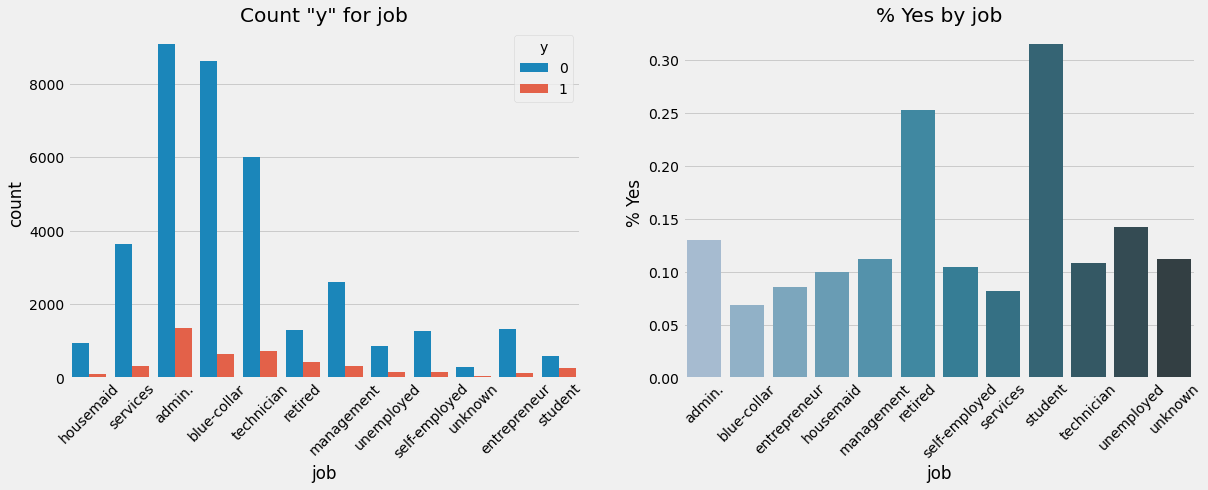

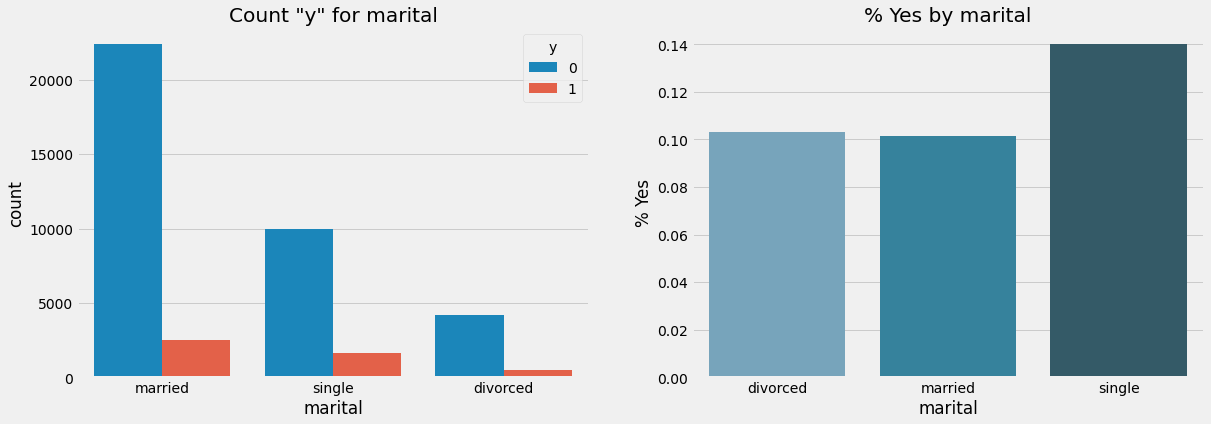

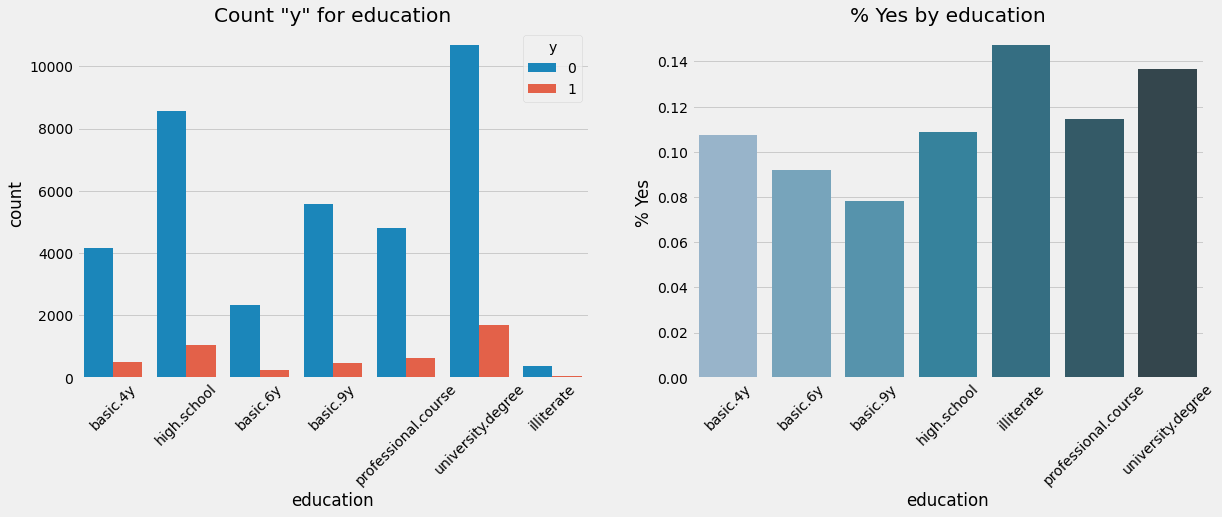

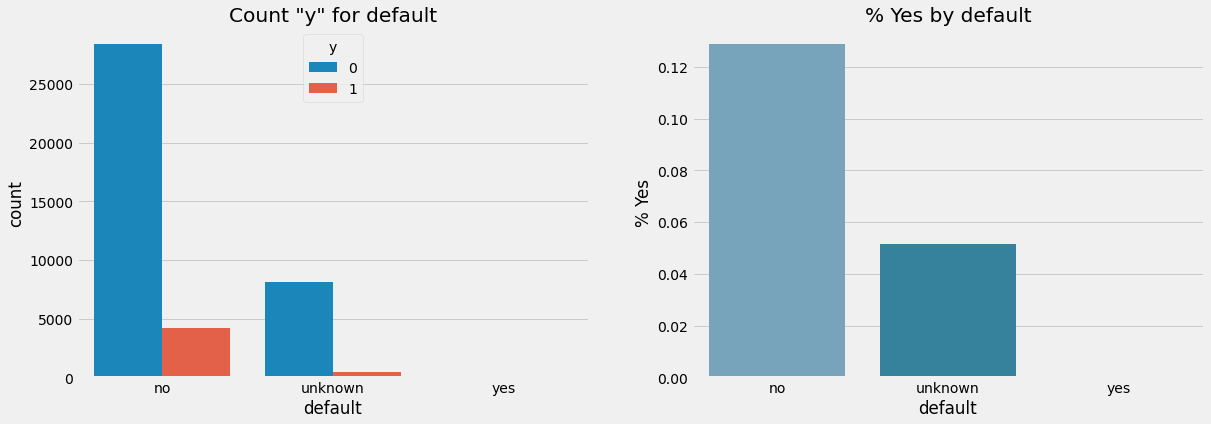

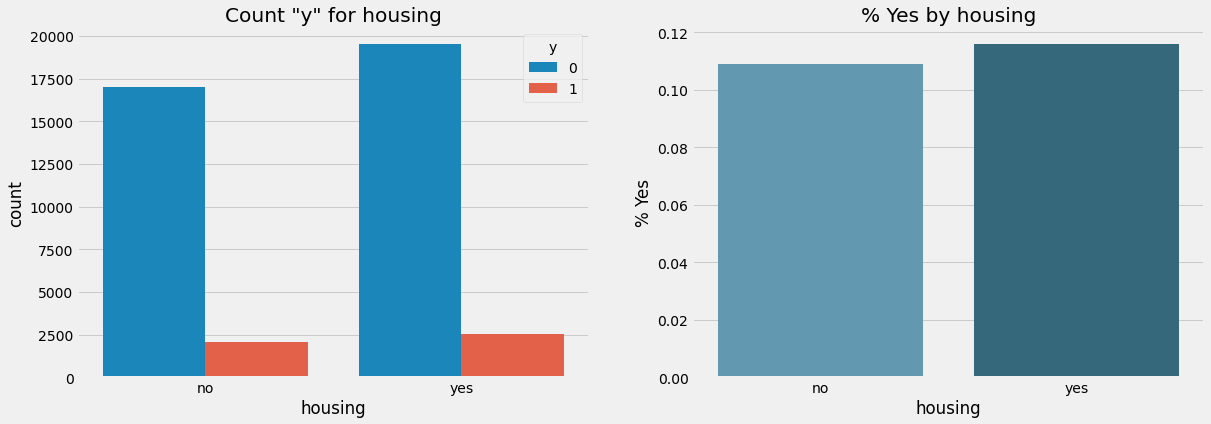

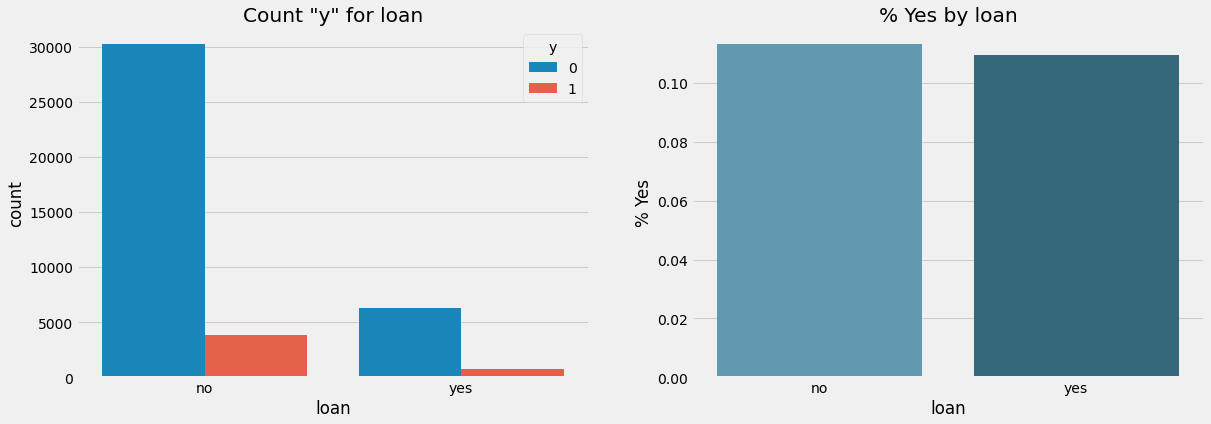

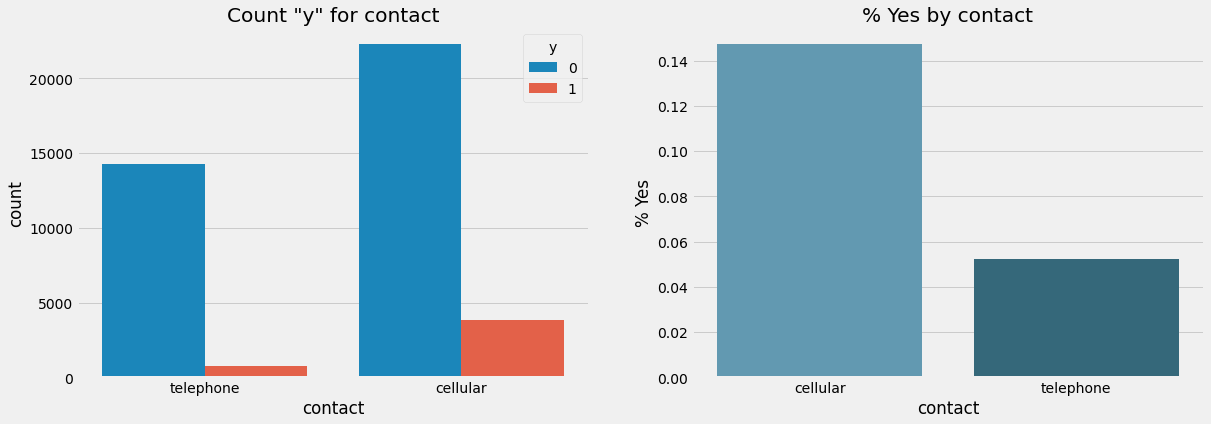

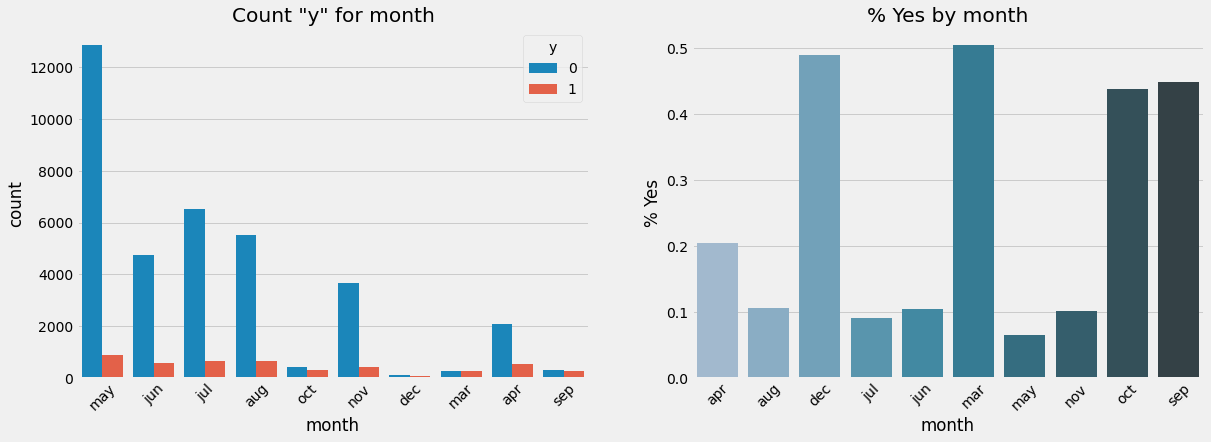

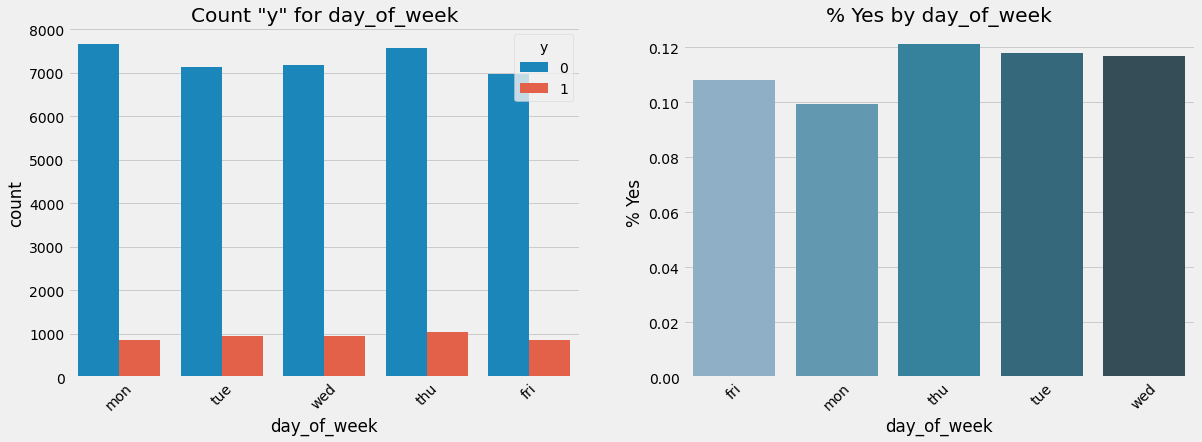

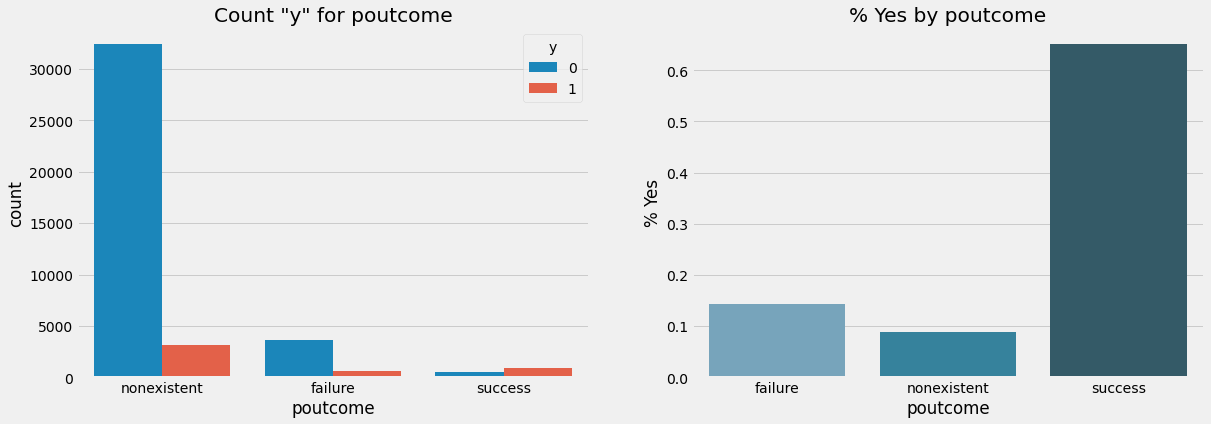

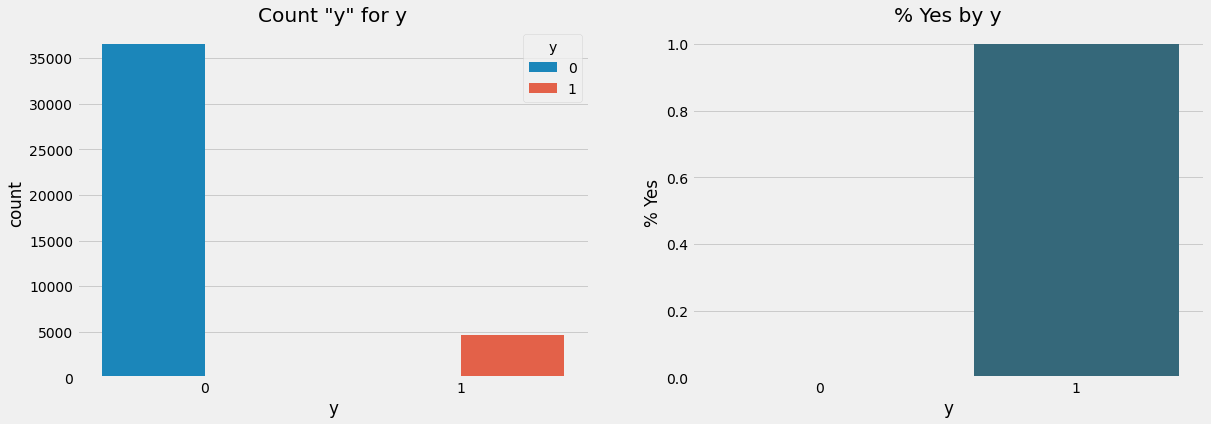

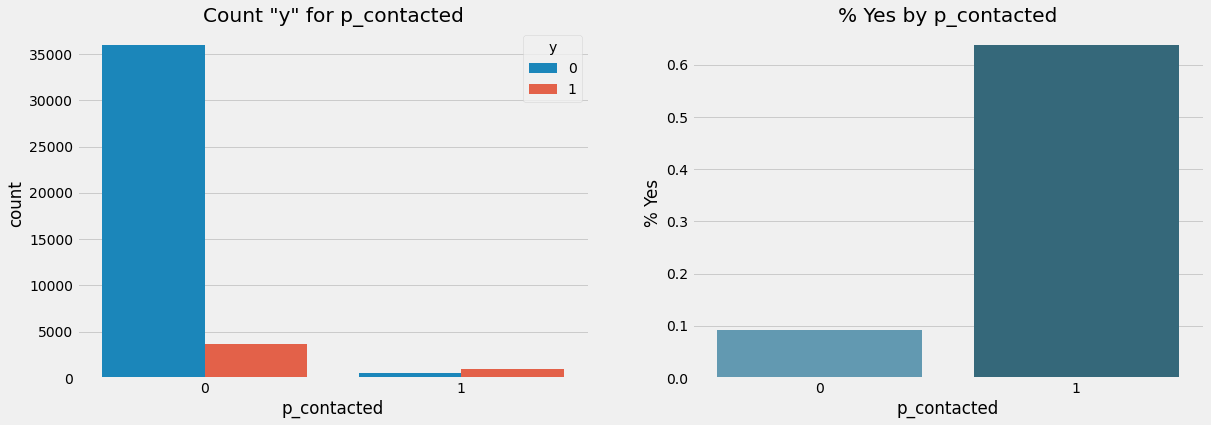

In [35]:
# iterate through the categorical variables and plot the value counts and 
# percentage 'y' for each value

for col in cat_data.columns.values:
    plt.figure(figsize=(18, 6))    
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_data[col], data=cat_data, hue='y')
    plt.title(f'Count "y" for {col}')
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)
    
    plt.subplot(1,2,2)
    cat_percent = cat_data.groupby(col)['y'].mean()
    sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')
    plt.ylabel('% Yes')
    plt.title(f'% Yes by {col}')
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)
    plt.show()

#### Categorical feature observations

* `Job`: Overall job does not appear to be much of a predictor of success for the marketing campaign. Although there does appear to be greater success among students, retirees and admin professionals, these groups represent relatively small numbers within the overall campaign. It could be a sign that this particular product was well suited to them.
* `Marital`: Success among married and divorced people appear roughly the same, but there is much more success among single people. That may turn out to be a good predictor. 
* `Education`: Success seems a little more evenly distributed here. It appears high among the illiterate, but they represent a very small number of the total count. University educated individuals appear to respond well, and they are the largest group in the data. This feature could be a good predictor.
* `Default`: Those that have not defaulted on a loan are much more likely to become customers than the unknowns, and at a slightly higher average ~12.5% than the overall average ~10%.
* `Housing`: Whether or not someone has a home loan does not appear to have much of a relationship with the success of the campaign.
* `Loan`: Personal loans also do not appear to be much of a predictor.
* `Contact`: Customers contacted via cellular phone appear to be much more likely to be successful prospects, this is quite interesting. Cellular customers were also contacted more, but not with so much imbalanced distribution.
* `Month`: Month does not appear to have a very significant effect. There are months with very high success rates, but those are often months that also have very low relative counts. It would be interesting to know if those are follow-ups in the later months, or return customers or warm leads in the early months. Overall it appears that the majority of the campaign occured between May and August
* `Day of week`: Day of week does not seem to have a large amount of significance, but the middle days do appear to be slightly more successful than Monday and Friday.
* `Poutcome`: The outcome of the previous marketing campaign does appear to have an effect. Even though it is a very small number, prior success seems to suggest later success. And, those that were contacted and failed also are more successful, indicating that returning to previous targets may have a positive impact.
* `Pcontacted`: Those that had been previously contacted in the campaign ended up signing up at a rate of 60%, that is very high, even though the overall count of these individuals is small. This variable is tough to interpret because intuitively it makes sense that customers that have been contacted before are more likely to have signed up than those called for the first time simply because they have been given more opportunities to say "yes". There are a number of reasons these people may have been called more than once that do not suggest a greater amount of calls necessarily results in greater customer conversion, but it also suggest that customers that are leaning yes may be more likely converted with persistence.

Variables to keep an eye on are: `Pcontacted`, `Job_student`, `Job_retired`, `Marital_single`, `Contact_cellular`

Variables that may not be as helpful: `Month`, `Day of week`, `Housing`, `Loan`

Perhaps one of the most important observations we can see from above is that our target variable, `y` is imbalanced. Only ~11% of the rows observed here result in a positive customer conversion. We will take that into account as we are doing our final feature transformations.

### Numerical Variables
Let's dig deeper into the numerical variables and see if we can gain more early insights.

Let's remember that we began with a different list of variables than we have now, so let's check and see what we need to update.

In [36]:
# check the values we have for continuous variables
numerical_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [37]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  \
0           1.1          93.994          -36.4      4.857       5191.0  no   
1           1.1          93.994          -36.4      4.857       5191.0  no   
2           1.1          93.994          -36.4      4.857       5191.0  no   
3           1.1          93.994          -36.4      4.857       5191.0  no   
4           1.1          93.994          -36.4      4.857       5191.0  no   

   p_contacted  
0            0  
1            0  
2            0  
3            0  
4            0

In [38]:
#drop 'pdays' from the list 
numerical_features.remove('pdays')
numerical_features

['age',
 'duration',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [39]:
# create a dataframe of numerical features using our numerical list
numerical_data = df[numerical_features]
numerical_data.head()

age  duration  campaign  previous  emp.var.rate  cons.price.idx  \
0   56       261         1         0           1.1          93.994   
1   57       149         1         0           1.1          93.994   
2   37       226         1         0           1.1          93.994   
3   40       151         1         0           1.1          93.994   
4   56       307         1         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0

In [40]:
# create a function that iterates through the dataframe and plots histograms for the numerical features
def plot_numerical(df):
    
    fig = plt.figure(figsize=(15,30))
    plt.subplots_adjust(hspace=.25)

    nrows = len(df.columns) //2 +1 
    ncols = 2
    
    for i,t in enumerate(list(df.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        sns.distplot(a= df[t],   
                     ax=ax)
        plt.title(t + '_distribution')

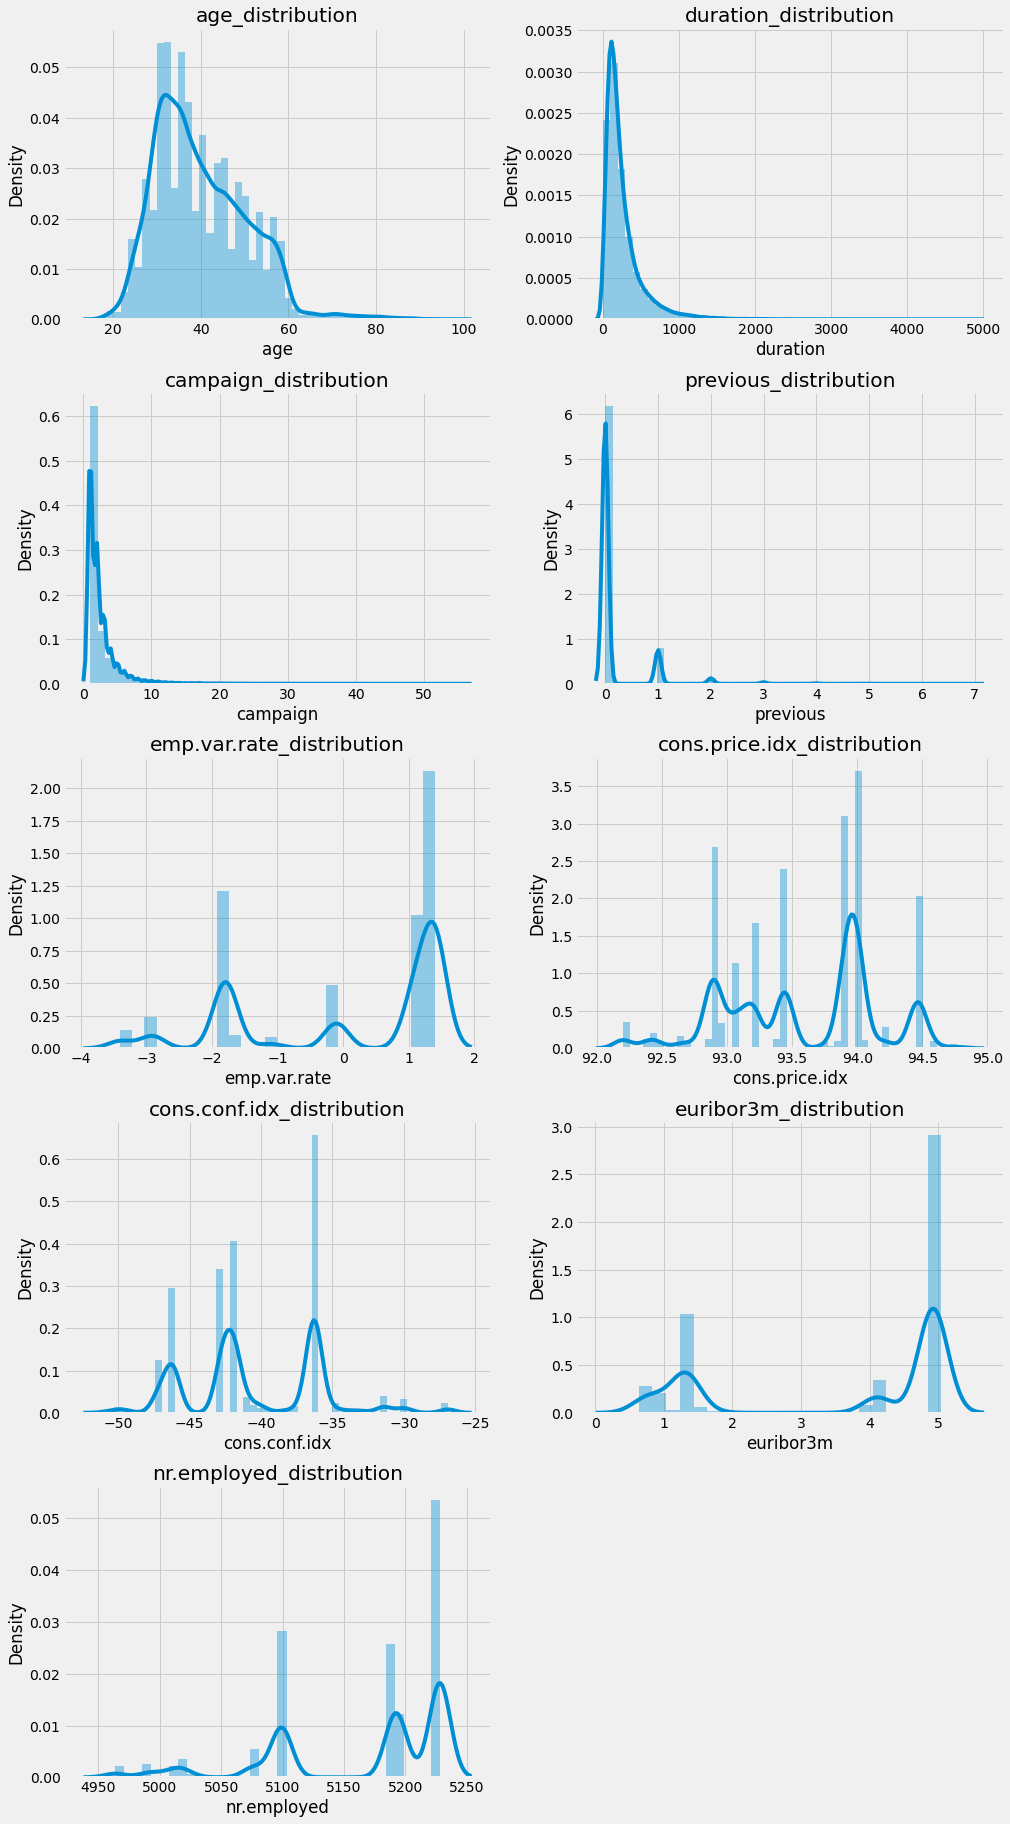

In [41]:
# plot histograms for the continuus variables
plot_numerical(numerical_data)

#### Numerical features distribution observations
* Most of the data are <b>not normally</b> distributed, with `Age` being the closest variable that is
* The variables that have to do with number of times contacted (campaign), or previously contacted (previous), are all very skewed to the right due to the fact that most people had not previously been contacted or were not contacted a large number of times
* Other variables like `cons.price.idx` and `con.conf.idx` have similar shapes and which suggests there might be some sort of correlation. Similar for `emp.var.rate`, `nr.employed` and the `euribor3m`.

We've seen one representation of outliers here, let's see how they look with a box plot

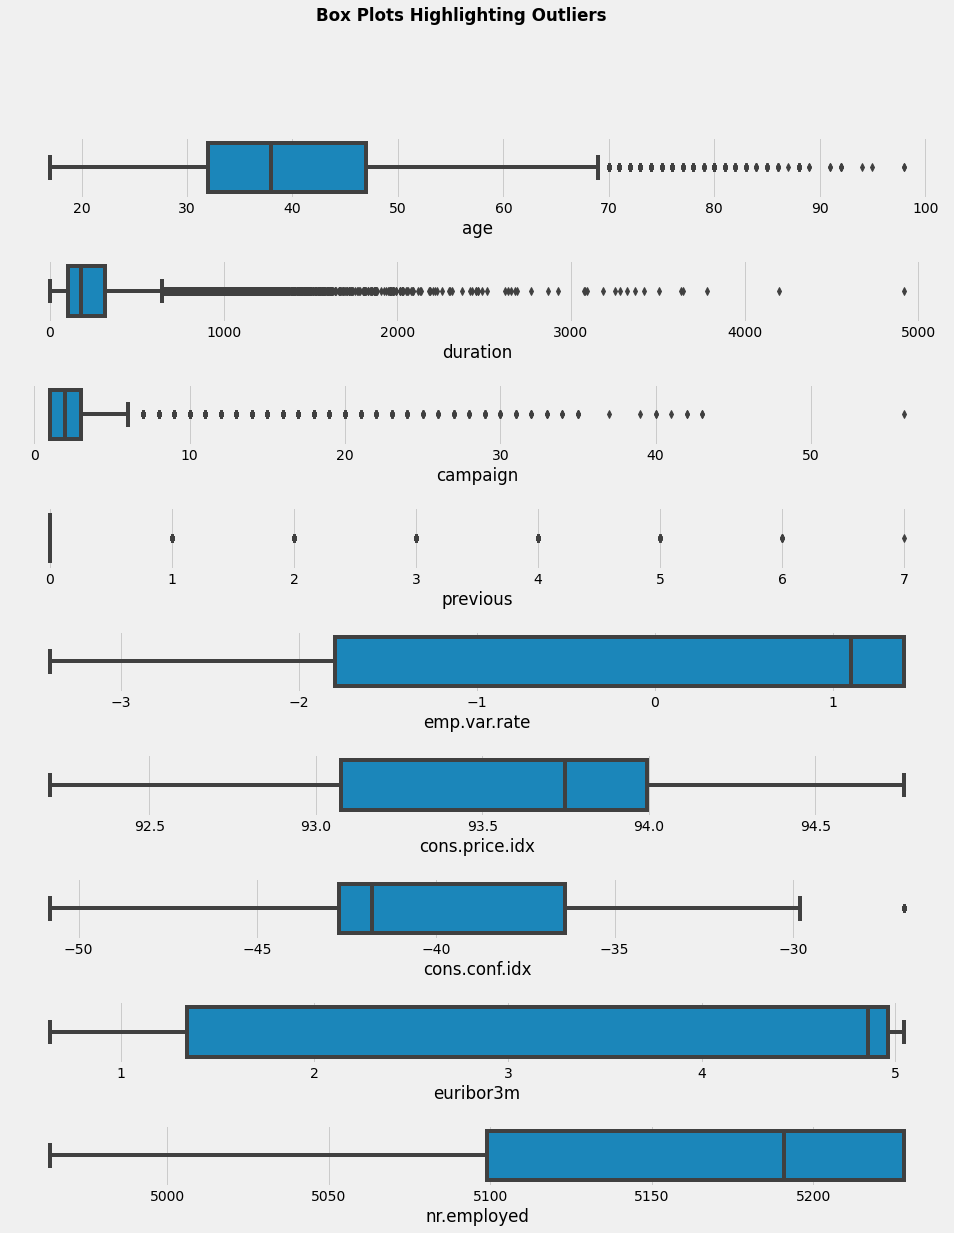

In [42]:
# create a box plot for each continuous variable
nrows = len(numerical_features)
fig, axes = plt.subplots(ncols=1, 
                         nrows=nrows, 
                         figsize=(15,nrows*2))
plt.subplots_adjust(hspace=1)

for i, var in enumerate(numerical_features):
    sns.boxplot(numerical_data[var], orient='h', ax=axes[i])

fig.suptitle('Box Plots Highlighting Outliers', fontweight='bold')
plt.show()

#### Observations for numuerical data:
* Similar to observations above, outliers for age begin around 70
* `Campaign` and `previous` are tightly clustered around 0 and lower numbers, almost to the point of binning them our creating a categorical similar to what we did with p_contacted
* Our economic variables all seem to have few outliers, which is not surprising given that many of them are indexes and likely designed to stay within a certain range. These may be more reliable predictors

### Check for correlations and multicollinearity

Lets check if there are not too many highly correlated values among the predictive variable, also known as checking for multicollinearity.  This is important to ensure that one variable can change while others remain constant. In other words, the predictors are mainly influencing the target variable `y`. 

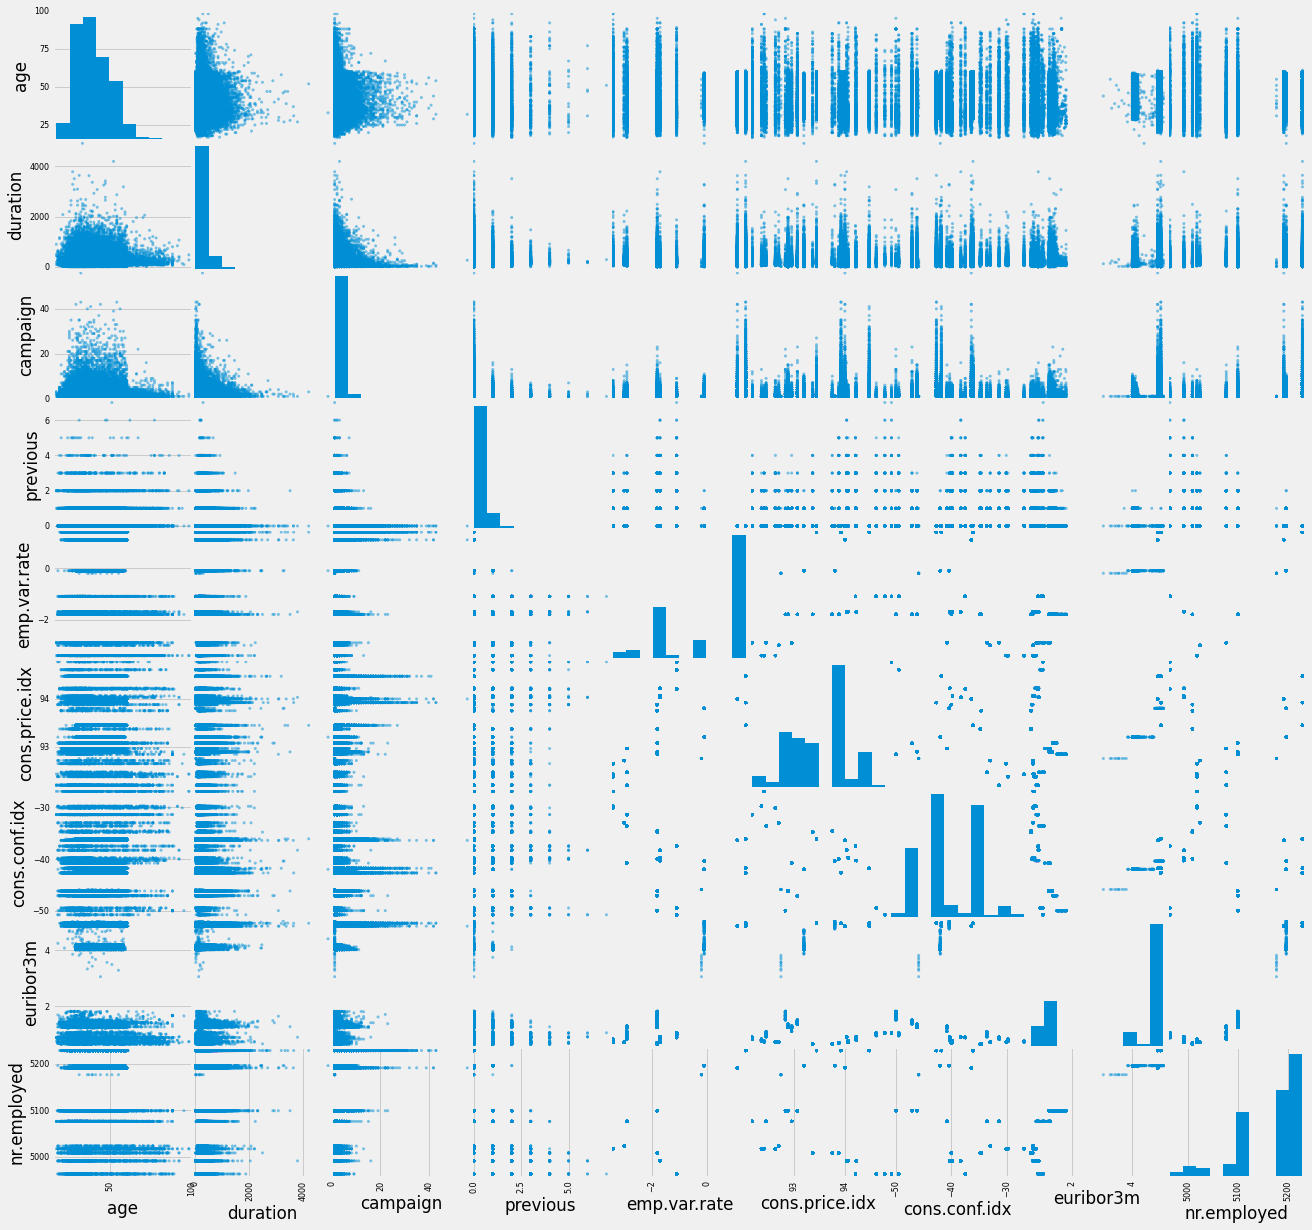

In [43]:
# plot a scatter matrix of all continuous variables and observe realtionships
pd.plotting.scatter_matrix(numerical_data, figsize=(20,20));

<b>Observations:</b>  There doesn't seem to be any liner relationships, but there there may be some very highly correlated pieces of data based on the plots that show little variation. Remembering that there are over 40,000 points of data in this dataset, any of the plots that have large areas of blank space may suggest a very tight cluster and potential correlation.

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
numerical_data.head()

age  duration  campaign  previous  emp.var.rate  cons.price.idx  \
0   56       261         1         0           1.1          93.994   
1   57       149         1         0           1.1          93.994   
2   37       226         1         0           1.1          93.994   
3   40       151         1         0           1.1          93.994   
4   56       307         1         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0

In [46]:
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_data.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(len(numerical_data.columns))]

In [47]:
# output VIF 
vif_data

feature           VIF
0             age     16.047238
1        duration      2.008271
2        campaign      1.921431
3        previous      1.503023
4    emp.var.rate     28.900286
5  cons.price.idx  22309.341881
6   cons.conf.idx    118.225898
7       euribor3m    226.237346
8     nr.employed  26290.980840

Relavitely high VIF for `nr.employed`, `cons.price.idx`, `euribor3m` and `cons.conf.idx`

### Age Scatter Plots
`Age` seems to have the largest number of unique values, so to explore more, let's make more scatter plots of `age` vs all other predictors, and see if there is a relationship with `y`

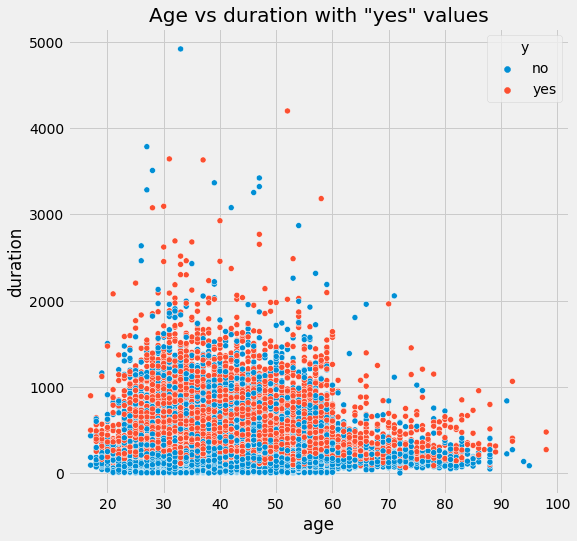

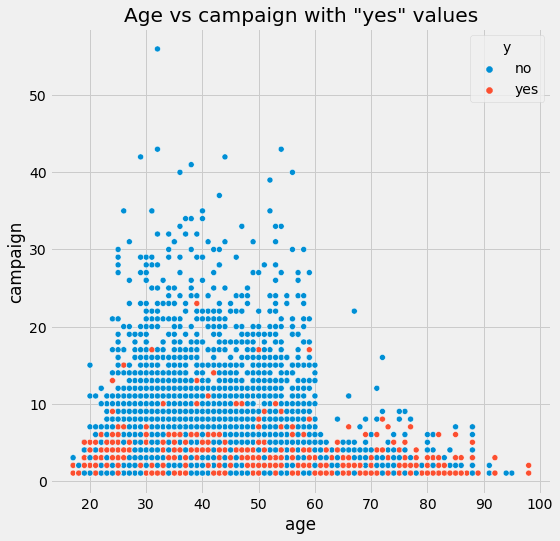

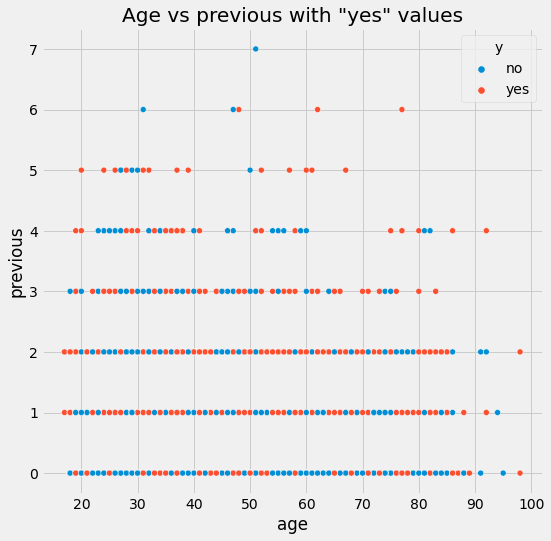

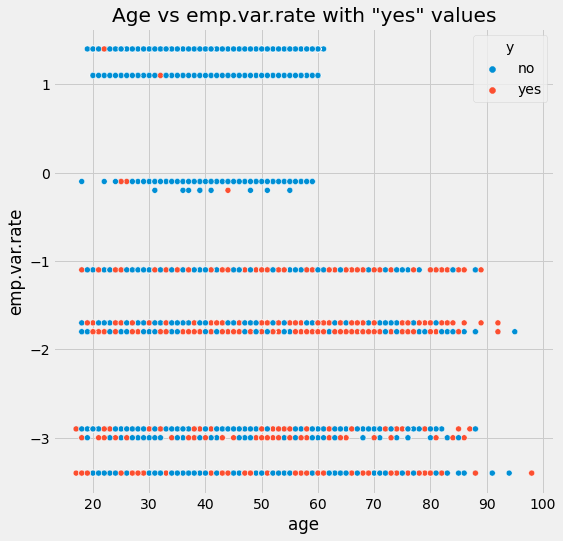

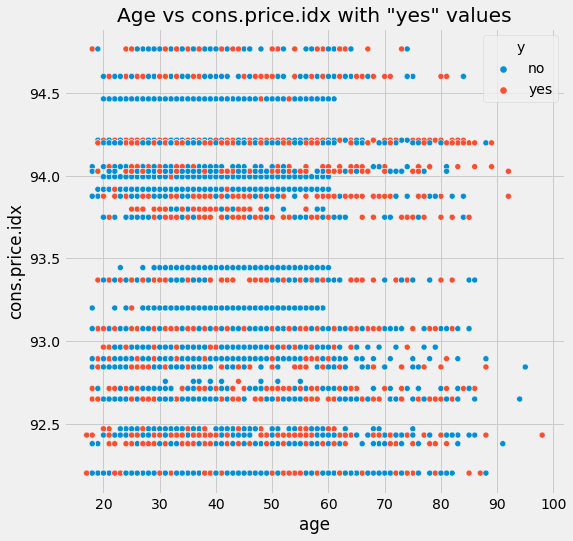

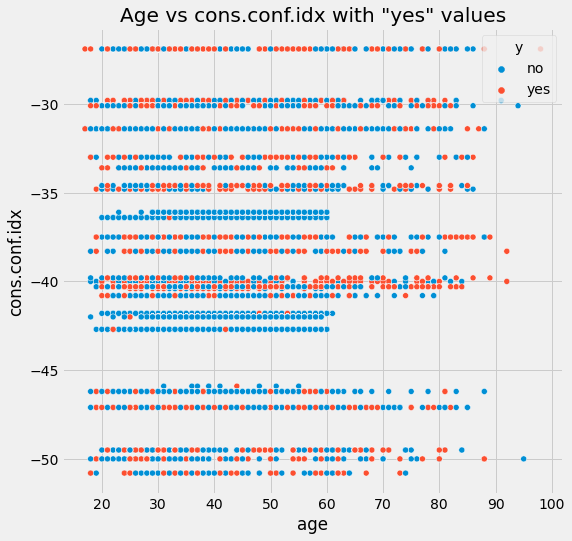

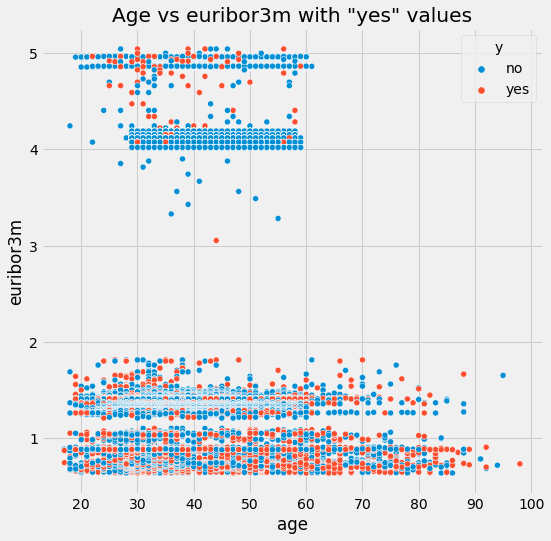

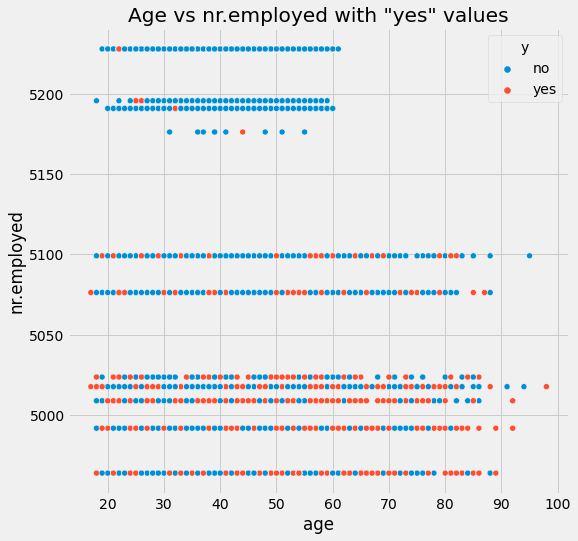

In [48]:
numerical_vars = list(numerical_data.columns.values)
numerical_vars.remove('age')

for v in numerical_vars:
    fig = plt.figure(figsize=(8,8))
    sns.scatterplot(x=df.age, y=df[v], hue='y', data=df)
    plt.title(f'Age vs {v} with "yes" values')
    plt.show()

<b>Observations:</b> 
* Most of these plots don't appear to suggest a clear pattern with `y`. 
* There does appear to be some relationship with lower values of `campaign`, middle values of `emp.var.rate` and lower values of `nr.employed`. 
* We will need to scale a lot of this data later, and if the plots are more discernable for clearer patterns.

### Correlation Heatmaps
As mentioned above, we want to check for highly correlated values and consider removing them. Let's pay attention for values above 0.7 to 0.8

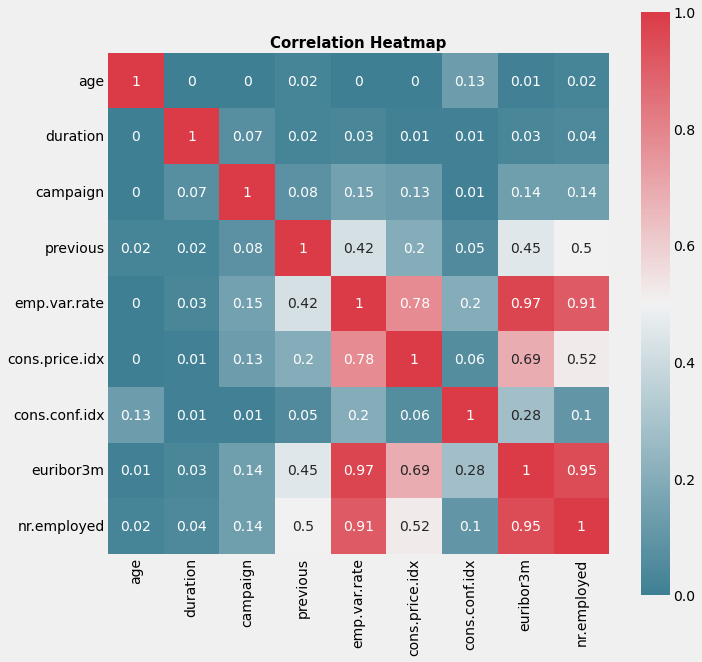

In [49]:
# plot a heatmap of correlations for our categorical values
correlation = abs(round(numerical_data.corr(), 2))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, 
            annot= True, 
            square= True, 
            cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

<b>Observations:</b> `emp.var.rate` looks to be the most highly correlated with other values, with three correlations over .7. Let's drop that from the data and see what happens.

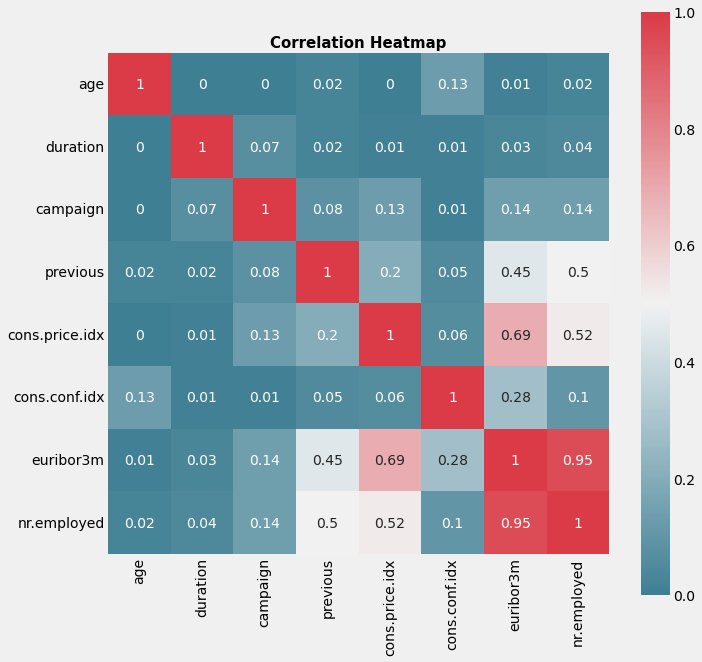

In [50]:
# check correlations without the 'emp.var.rate' variable 
correlation = abs(round(numerical_data.drop(columns=['emp.var.rate']).corr(), 2))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, 
            annot= True, 
            square= True, 
            cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

<b>Observations:</b> This plot looks much better. We now only see a very high correlation between `nr.employed` and `euribor3m`. However, `euribor3m` also has a nearly high correlation with `cons.price.idx`, so let's dorp that one as well and assess.

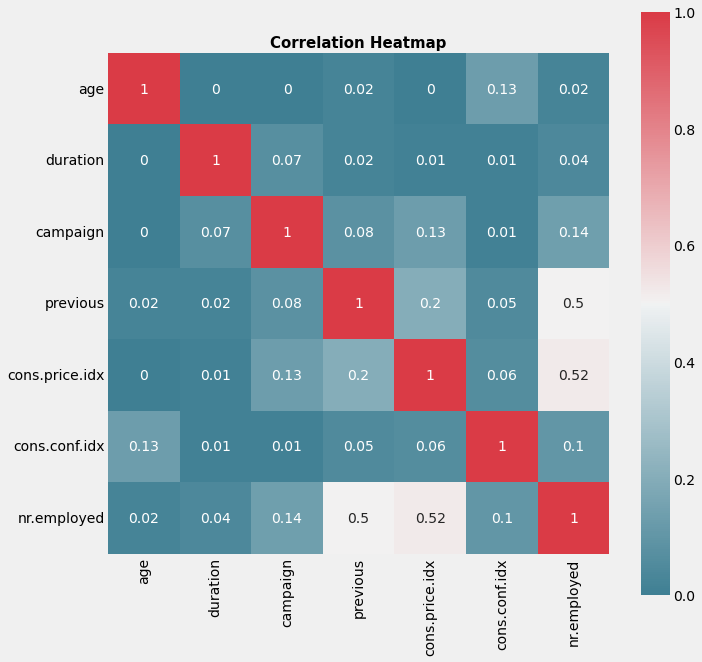

In [51]:
# check correlations without 'euribor3m' and 'emp.var.rate'
correlation = abs(round(numerical_data.drop(columns=['euribor3m', 'emp.var.rate']).corr(), 2))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, 
            annot= True, 
            square= True, 
            cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

<b>Observations:</b> This looks much better. We're now seeing no high correlations between any of our continuous variables.

### Modeling data
We now know which variables we want to keep for our initial modeling. 

All of our previous categorical variables, plus the remaining continuous variables.

We still have a lot of feature transformation to do, and depending on the performance of our models we may still add data back later if it makes sense. But, for now let's drop those variables and move forward with transformations

In [52]:
# create a copy of our new dataset without the continuous variables we want to drop
model_data = df.drop(columns=['euribor3m', 'emp.var.rate']).copy()
model_data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   cons.price.idx  cons.conf.idx  nr.employed   y  p_contacted  
0          93.994          -36.4       5191.0  no            0  
1          93.994          -36.4       5191.0  no            0  
2          93.994          -36.4       5191.0  no            0  
3          93.994          -36.4       5191.0  no            0  
4          93.994          -36.4       5191.0  no            0

In [53]:
model_data.shape

(41188, 20)

## 5. Feature Transformations

In this section we will start transforming our data to be more readable by machine learning models. We will:

* <b>Get dummies:</b> ML models largely cannot read text strings, so we will transform our categorical variables into series of 0's and 1's with onehot encoding
* <b>Train-test split:</b> Split our data up into our training and test sets
* <b>Scale data:</b> transform the variable so that they have a similar scale
* <b>Deal with class imbalance:</b> apply SMOTE in order to try to adjust for the imbalance in our label data

At the end of this section we will have a few variations of the data to work with and see which our models perform the best against.

* <b>original data</b> (w/dummies)
* <b>scaled data</b>
* <b>SMOTE data</b> (we will apply this to the scaled data)

### Get Dummies
As mentioned above, ML models do not deal with text strings, so we'll need to transform our categorical data with one-hot encoding.

One question for us is whether or not we want to keep the first value. That means, do we want to create a 0 or 1 for every categorical value in our data, or, can we by inference drop one of the values and know that all 0's in the remaining data implies a 1 for the value that is no longer represented in the data?

For a binary variable the choice is obvious, we want to drop the first because the opposite value is obvious. But for categorical variables with more than 2 values it might not be as obvious.

This choice does come at a cost. Keeping the first value for all of our data will increase the dimensionality and therefor the computing resources required to run our models.

As for this analysis let's go with the method that is the most inclusive for now and keep the first value. We can go back and drop the binary values that are truly unnecessary, and let's see how our model does.

Let's first check to see which variables are binary, so we'll know where we want to go back and drop.

In [54]:
# check the unique values for each variable
for col in model_data.columns.values:
    if model_data[col].nunique() == 2:
        print(f'{col} is binary')

housing is binary
loan is binary
contact is binary
y is binary
p_contacted is binary


Now we know which values to look for. It looks like we'll only have to go back and drop a few.

In [55]:
# one-hot encode model_data, check the first 5 rows and shape
data_w_dummies = pd.get_dummies(model_data, drop_first=False)
display(data_w_dummies.head())
data_w_dummies.shape

age  duration  campaign  pdays  previous  cons.price.idx  cons.conf.idx  \
0   56       261         1    999         0          93.994          -36.4   
1   57       149         1    999         0          93.994          -36.4   
2   37       226         1    999         0          93.994          -36.4   
3   40       151         1    999         0          93.994          -36.4   
4   56       307         1    999         0          93.994          -36.4   

   nr.employed  p_contacted  job_admin.  job_blue-collar  job_entrepreneur  \
0       5191.0            0           0                0                 0   
1       5191.0            0           0                0                 0   
2       5191.0            0           0                0                 0   
3       5191.0            0           1                0                 0   
4       5191.0            0           0                0                 0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0              1               0            0                  0   
1              0               0            0                  0   
2              0               0            0                  0   
3              0               0            0                  0   
4              0               0            0                  0   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0             0            0               0               0            0   
1             1            0               0               0            0   
2             1            0               0               0            0   
3             0            0               0               0            0   
4             1            0               0               0            0   

   marital_divorced  marital_married  marital_single  education_basic.4y  \
0                 0                1               0                   1   
1                 0                1               0                   0   
2                 0                1               0                   0   
3                 0                1               0                   0   
4                 0                1               0                   0   

   education_basic.6y  education_basic.9y  education_high.school  \
0                   0                   0                      0   
1                   0                   0                      1   
2                   0                   0                      1   
3                   1                   0                      0   
4                   0                   0                      1   

   education_illiterate  education_professional.course  \
0                     0                              0   
1                     0                              0   
2                     0                              0   
3                     0                              0   
4                     0                              0   

   education_university.degree  default_no  default_unknown  default_yes  \
0                            0           1                0            0   
1                            0           0                1            0   
2                            0           1                0            0   
3                            0           1                0            0   
4                            0           1                0            0   

   housing_no  housing_yes  loan_no  loan_yes  contact_cellular  \
0           1            0        1         0                 0   
1           1            0        1         0                 0   
2           0            1        1         0                 0   
3           1            0        1         0                 0   
4           1            0        0         1                 0   

   contact_telephone  month_apr  month_aug  month_dec  month_jul  month_jun  \
0                  1          0        

(41188, 60)

In [56]:
# check column names, there are 58 of them
data_w_dummies.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'p_contacted', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_unknown', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_

Based on above output, we will drop:

* `loan_no`
* `housing_no`
* `contact_telephone`
* `y_no` (our target)
* `p_contacted` was already encoded, do not drop

It will be interesting to see if any of these features have any importance. As noted above in our categorical variable analysis we know the `loan` and `housing` indicators seem to be very strong predictors.

In [57]:
# drop our redundant binary variables and inspect the dataframe
data_w_dummies.drop(columns=['loan_no', 'housing_no', 
                             'contact_telephone', 'y_no'], 
                    inplace=True)
display(data_w_dummies.head())
data_w_dummies.shape

age  duration  campaign  pdays  previous  cons.price.idx  cons.conf.idx  \
0   56       261         1    999         0          93.994          -36.4   
1   57       149         1    999         0          93.994          -36.4   
2   37       226         1    999         0          93.994          -36.4   
3   40       151         1    999         0          93.994          -36.4   
4   56       307         1    999         0          93.994          -36.4   

   nr.employed  p_contacted  job_admin.  job_blue-collar  job_entrepreneur  \
0       5191.0            0           0                0                 0   
1       5191.0            0           0                0                 0   
2       5191.0            0           0                0                 0   
3       5191.0            0           1                0                 0   
4       5191.0            0           0                0                 0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0              1               0            0                  0   
1              0               0            0                  0   
2              0               0            0                  0   
3              0               0            0                  0   
4              0               0            0                  0   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0             0            0               0               0            0   
1             1            0               0               0            0   
2             1            0               0               0            0   
3             0            0               0               0            0   
4             1            0               0               0            0   

   marital_divorced  marital_married  marital_single  education_basic.4y  \
0                 0                1               0                   1   
1                 0                1               0                   0   
2                 0                1               0                   0   
3                 0                1               0                   0   
4                 0                1               0                   0   

   education_basic.6y  education_basic.9y  education_high.school  \
0                   0                   0                      0   
1                   0                   0                      1   
2                   0                   0                      1   
3                   1                   0                      0   
4                   0                   0                      1   

   education_illiterate  education_professional.course  \
0                     0                              0   
1                     0                              0   
2                     0                              0   
3                     0                              0   
4                     0                              0   

   education_university.degree  default_no  default_unknown  default_yes  \
0                            0           1                0            0   
1                            0           0                1            0   
2                            0           1                0            0   
3                            0           1                0            0   
4                            0           1                0            0   

   housing_yes  loan_yes  contact_cellular  month_apr  month_aug  month_dec  \
0            0         0                 0          0          0          0   
1            0         0                 0          0          0          0   
2            1         0                 0          0          0          0   
3            0         0                 0          0          0          0   
4            0         1                 0          0          0          0   

   month_jul  month_jun  month_mar  month_may 

(41188, 56)

Let's lets also make sure that our target variable still looks right. It should be roughly 11% 1's.

In [58]:
# Check the value counts our our target variable
data_w_dummies.y_yes.value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y_yes, dtype: float64

Looks good! Let's move into dividing our data into training and test data.

In [59]:
numerical_data_v2 = numerical_data.drop(columns=['euribor3m', 'emp.var.rate'])
numerical_data_v2.head()

age  duration  campaign  previous  cons.price.idx  cons.conf.idx  \
0   56       261         1         0          93.994          -36.4   
1   57       149         1         0          93.994          -36.4   
2   37       226         1         0          93.994          -36.4   
3   40       151         1         0          93.994          -36.4   
4   56       307         1         0          93.994          -36.4   

   nr.employed  
0       5191.0  
1       5191.0  
2       5191.0  
3       5191.0  
4       5191.0

### Train-Test Split
To train and evaluate model performance, we will need to split our data into a training set, and a test set. This will help us avoid over-fitting our models by allowing us to test our models on data it has not seen before. We will try a conventional split of 80/20 (20% for testing).

In [60]:
# split out our label (target) data and variables
target = data_w_dummies.y_yes
features = data_w_dummies.drop(columns=['y_yes'])

In [61]:
# check to ensure we've kept the right data
features.head()

age  duration  campaign  pdays  previous  cons.price.idx  cons.conf.idx  \
0   56       261         1    999         0          93.994          -36.4   
1   57       149         1    999         0          93.994          -36.4   
2   37       226         1    999         0          93.994          -36.4   
3   40       151         1    999         0          93.994          -36.4   
4   56       307         1    999         0          93.994          -36.4   

   nr.employed  p_contacted  job_admin.  job_blue-collar  job_entrepreneur  \
0       5191.0            0           0                0                 0   
1       5191.0            0           0                0                 0   
2       5191.0            0           0                0                 0   
3       5191.0            0           1                0                 0   
4       5191.0            0           0                0                 0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0              1               0            0                  0   
1              0               0            0                  0   
2              0               0            0                  0   
3              0               0            0                  0   
4              0               0            0                  0   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0             0            0               0               0            0   
1             1            0               0               0            0   
2             1            0               0               0            0   
3             0            0               0               0            0   
4             1            0               0               0            0   

   marital_divorced  marital_married  marital_single  education_basic.4y  \
0                 0                1               0                   1   
1                 0                1               0                   0   
2                 0                1               0                   0   
3                 0                1               0                   0   
4                 0                1               0                   0   

   education_basic.6y  education_basic.9y  education_high.school  \
0                   0                   0                      0   
1                   0                   0                      1   
2                   0                   0                      1   
3                   1                   0                      0   
4                   0                   0                      1   

   education_illiterate  education_professional.course  \
0                     0                              0   
1                     0                              0   
2                     0                              0   
3                     0                              0   
4                     0                              0   

   education_university.degree  default_no  default_unknown  default_yes  \
0                            0           1                0            0   
1                            0           0                1            0   
2                            0           1                0            0   
3                            0           1                0            0   
4                            0           1                0            0   

   housing_yes  loan_yes  contact_cellular  month_apr  month_aug  month_dec  \
0            0         0                 0          0          0          0   
1            0         0                 0          0          0          0   
2            1         0                 0          0          0          0   
3            0         0                 0          0          0          0   
4            0         1                 0          0          0          0   

   month_jul  month_jun  month_mar  month_may 

In [62]:
# split our date into train and test sets and store in a dictionary 'original_data'
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=.20,
                                                    random_state= 175)

orig_processed_data = {'X_train': X_train, 'y_train':y_train,
                 'X_test': X_test, 'y_test':y_test}

In [63]:
orig_processed_data['y_train']

4753     0
19442    0
18951    0
16213    0
17772    0
        ..
3713     0
23541    0
40643    1
35446    0
9812     0
Name: y_yes, Length: 32950, dtype: uint8

### Scale Data
A numerical feature set with different scales can have an outsized effect on the performance of a model. We should scale our data to similar ranges so the weight of each numerical feature is well distributed. Scaling should also increase training time by decreasing the number iterations for gradient descent.

We should note the importance to scale after doing the train-test split to avoid data leakage, which is accidentally sharing data between the training and test data sets. The <b>scaling parameters will come from the training set</b>, and will be applied on both the training set and the test set.

In [64]:
scaler = StandardScaler()

# fit and transform our trainng test
scaled_data_train = scaler.fit_transform(X_train)

# transform the test set
scaled_data_test = scaler.transform(X_test)

# the StandardScaler turns our data into an array, so if we want to see what
# it looks like with our column names we'll need to put it back into a dataframe
scaled_df_train = pd.DataFrame(scaled_data_train, 
                               columns=X_train.columns)

scaled_df_test = pd.DataFrame(scaled_data_test, 
                              columns=X_test.columns)
print("\nscaled training set:")
display(scaled_df_train.head(2))
print("\nscaled test set:")
display(scaled_df_test.head(2))


scaled training set:


age  duration  campaign     pdays  previous  cons.price.idx  \
0 -1.249933  0.022289 -0.560210  0.194409 -0.351115        0.723778   
1  0.187218 -0.579971 -0.204684  0.194409 -0.351115       -0.225697   

   cons.conf.idx  nr.employed  p_contacted  job_admin.  job_blue-collar  \
0       0.887536     0.332984     -0.19441     1.70943        -0.538499   
1       0.952377     0.845259     -0.19441    -0.58499        -0.538499   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0          -0.19051      -0.162136       -0.275405    -0.208125   
1          -0.19051      -0.162136       -0.275405    -0.208125   

   job_self-employed  job_services  job_student  job_technician  \
0          -0.187148     -0.325693    -0.148719       -0.441844   
1          -0.187148     -0.325693    -0.148719        2.263241   

   job_unemployed  job_unknown  marital_divorced  marital_married  \
0       -0.159754      -0.0897         -0.354904        -1.234635   
1       -0.159754      -0.0897         -0.354904         0.809956   

   marital_single  education_basic.4y  education_basic.6y  education_basic.9y  \
0        1.586716           -0.357878            -0.25804            2.399497   
1       -0.630232           -0.357878            -0.25804           -0.416754   

   education_high.school  education_illiterate  education_professional.course  \
0              -0.551428             -0.107727                      -0.387359   
1              -0.551428             -0.107727                       2.581583   

   education_university.degree  default_no  default_unknown  default_yes  \
0                     -0.65612    0.513622        -0.513481    -0.009542   
1                     -0.65612    0.513622        -0.513481    -0.009542   

   housing_yes  loan_yes  contact_cellular  month_apr  month_aug  month_dec  \
0     0.931051  2.194400         -1.321473   -0.26044  -0.419659  -0.067398   
1     0.931051 -0.455705          0.756731   -0.26044   2.382887  -0.067398   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0  -0.459247  -0.385596  -0.115665   1.416567  -0.335241  -0.134092   
1  -0.459247  -0.385596  -0.115665  -0.705932  -0.335241  -0.134092   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0  -0.119642        -0.488449        -0.506772        -0.515085   
1  -0.119642        -0.488449        -0.506772         1.941428   

   day_of_week_tue  day_of_week_wed  poutcome_failure  poutcome_nonexistent  \
0        -0.494588         2.020138         -0.341757              0.398987   
1        -0.494588        -0.495016         -0.341757              0.398987   

   poutcome_success  
0         -0.183998  
1         -0.183998


scaled test set:


age  duration  campaign     pdays  previous  cons.price.idx  \
0 -0.483452 -0.062645 -0.204684  0.194409  1.679288        1.077673   
1  0.570458  1.794325 -0.204684  0.194409 -0.351115        0.723778   

   cons.conf.idx  nr.employed  p_contacted  job_admin.  job_blue-collar  \
0       0.649785    -2.806944     -0.19441     1.70943        -0.538499   
1       0.887536     0.332984     -0.19441     1.70943        -0.538499   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0          -0.19051      -0.162136       -0.275405    -0.208125   
1          -0.19051      -0.162136       -0.275405    -0.208125   

   job_self-employed  job_services  job_student  job_technician  \
0          -0.187148     -0.325693    -0.148719       -0.441844   
1          -0.187148     -0.325693    -0.148719       -0.441844   

   job_unemployed  job_unknown  marital_divorced  marital_married  \
0       -0.159754      -0.0897         -0.354904         0.809956   
1       -0.159754      -0.0897         -0.354904         0.809956   

   marital_single  education_basic.4y  education_basic.6y  education_basic.9y  \
0       -0.630232           -0.357878            -0.25804           -0.416754   
1       -0.630232           -0.357878            -0.25804           -0.416754   

   education_high.school  education_illiterate  education_professional.course  \
0              -0.551428             -0.107727                      -0.387359   
1               1.813474             -0.107727                      -0.387359   

   education_university.degree  default_no  default_unknown  default_yes  \
0                      1.52411    0.513622        -0.513481    -0.009542   
1                     -0.65612    0.513622        -0.513481    -0.009542   

   housing_yes  loan_yes  contact_cellular  month_apr  month_aug  month_dec  \
0    -1.074055  2.194400          0.756731   -0.26044  -0.419659  -0.067398   
1     0.931051 -0.455705         -1.321473   -0.26044  -0.419659  -0.067398   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0  -0.459247  -0.385596  -0.115665  -0.705932  -0.335241  -0.134092   
1  -0.459247  -0.385596  -0.115665   1.416567  -0.335241  -0.134092   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0   8.358242        -0.488449        -0.506772        -0.515085   
1  -0.119642        -0.488449        -0.506772        -0.515085   

   day_of_week_tue  day_of_week_wed  poutcome_failure  poutcome_nonexistent  \
0        -0.494588         2.020138          2.926057             -2.506346   
1         2.021885        -0.495016         -0.341757              0.398987   

   poutcome_success  
0         -0.183998  
1         -0.183998

We can see here that our data has been scaled such that each variable exists in a common range. While this affect the values of our variables it shouldn't affect the distributions. Let's take a look at one example to see.

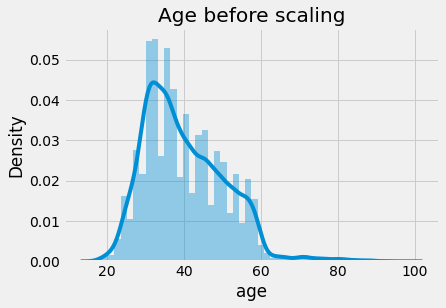

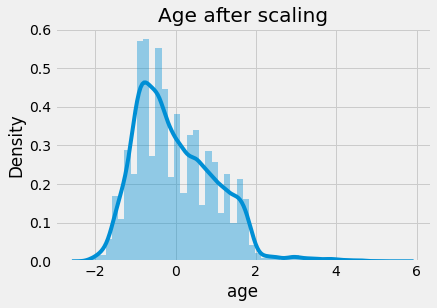

In [65]:
# age before scaling
sns.distplot(X_train.age)
plt.title('Age before scaling')
plt.show()
# age after scaling
sns.distplot(scaled_df_train.age)
plt.title('Age after scaling')
plt.show()

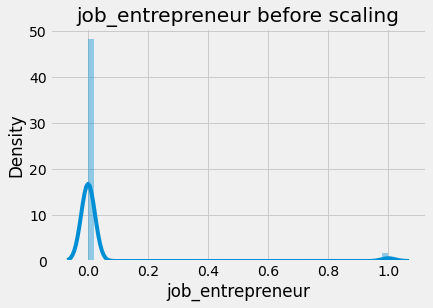

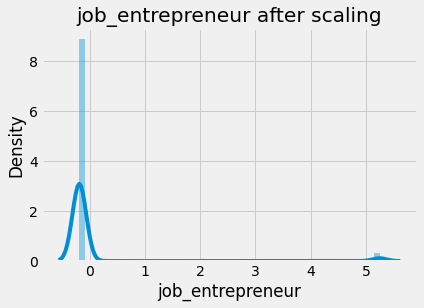

In [66]:
# Although it doesn't make sense to scale dummy variable, it doesn't
# effect the results as the distributions are the same
# job_entrepreneur before scaling
sns.distplot(X_train.job_entrepreneur)
plt.title('job_entrepreneur before scaling')
plt.show()

# job_entrepreneur after scaling
sns.distplot(scaled_df_train.job_entrepreneur)
plt.title('job_entrepreneur after scaling')
plt.show()

We see that the data is distributed the same, but now we have a much different range of values

In [67]:
# let's put our scaled data in a dictionary for ease of working with it later
scaled_data = {'X_train': scaled_df_train, 'y_train':y_train, 
               'X_test': scaled_df_test, 'y_test':y_test}

### Class Imbalance - SMOTE
As seen above, we have class imbalance issue.  Though not that severe, it's still worth trying to address this issue to improve model performance. Only ~11% of our label data is a "yes" or "1". This needs to be accounted for in order to prevent the model from being accurate by simply predicting the right outcome 89% of the time, which is already the prevalence of 0's in the label column.

One way to address this issue is oversampling the positive labels using the <b>Synthetic Minority Oversampling Technique (SMOTE)</b>. SMOTE generates new sample data for the minority class (in this case a 1 for 'y_yes' by creating 'synthetic' samples that are combinations of the closest minority class observations.

In [69]:
from imblearn.over_sampling import SMOTE 

# Previous original class distribution
print('Original class distribution: \n')
print(target.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(scaled_df_train
                                                        , y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    36548
1     4640
Name: y_yes, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

0    29231
1    29231
Name: y_yes, dtype: int64


It looks like we've effectively oversampled our data. Let's make this into a dataframe again to help keep track or our feature labels.

In [70]:
# store our SMOTE data in a dictionary
SMOTE_data = {'X_train': X_train_resampled, 'y_train':y_train_resampled,
              'X_test': scaled_df_test, 'y_test':y_test}

### Transformation Conclusions
We've completed our data transformations and ready to start modeling. We're moving forward with three versions of our data:

* original processed data
* scaled data
* SMOTE data

There is always more we can do to the data. If we do decide to do more we can always explore:

* Dimensionality reduction with Principal Component Analysis (PCA)
* Adding the data we removed back in
* Removing features that appear to not have much importance (feature selection)

## 6. Modeling
We're ready to start modeling! A very exciting phase of this analysis. We'll start to see what, if any, impact our transformations have had on model performance.

In this section we will experiment with several machine learning algorithms:

* Logistic Regression
* K-Nearest Neighbors
* Decision Trees and Random Forest
* Support Vector Machines (SVM)
* XGBoost

To yield the best performance for each model, we will also tune its hyperparameters using the grid search method.

### Model Scoring Notes:
As we work though our models we'll be looking at a few common evaluation metrics against the <b><u>test set</u></b> to determine which model and data treatment is performing best. We will observe:

<b>Train Accuracy vs. Test Accuracy:</b> We will compare these two metrics to check for overfitting - if there is a large gap between the two (more than 10%) we'll consider the model potentially overfitting.

<b>Accuracy:</b> Overall accuracy is the total number of predictions the model gets right (True Positives + True Negatives) / Total observations

* Accuracy is good simple metric to judge the performance of a classification model, but it can be misleading in cases with a class imbalance. It is relatively easy to be highly accurate if the data is highly imbalanced.

<b>Precision:</b> Of the total positive predictions, how many were actually positive - True Positive / (True Positive + False Positive)
* Precision is a good metric to use when the costs of false positives are high. Example: Evidence that suggests a person is guilty of a crime (like DNA matching). False positives in this example would have a severe cost to the person accused of the crime, precision is therefore very important.

<b>Recall:</b> Of the total actual positives, how many did we correctly predicted - True Positive / (True Positive + False Negative)
* Recall is a good metric to use when the costs of false negatives are high. Example: Detecting fraud or serious illnesses - either example can have a serious effect for an organization that fails to detect fraud early enough,or for a patient that needs care or could potentially be contagious

<b>F1 score:</b> F1 score is a balanced metric that combines precision and recall
* F1 score is best used when seeking a balance between precision and recall and performs well with unbalanced data. It penalizes models that skew too heavily toward precision or recall, and therefore will only be high if both are high.

<b>So, which metric is best for our business problem?</b>

* In our case we are trying to determine which customers are most likely to say "yes" and subscribe to the banking product
* What is the cost of a False Positive (we predict a customer will subscribe but they will not)?
    - We unnecessarily target them for more marketing - costing time and resources
    - We potentially annoy them by contacting them too much and hurt our chances of attracting them from future campaigns
* What is the cost of a False Negative (we predict a customer would not subscribe but they would)?
    - We potentially miss out on gaining this person as a customer, hence losing out on ptential revenue
    - We do not target them with additional marketing when it may be productive
    
It seems our trade-off is between the cost of marketing to a customer that is unlikely to subscribe and the missed revenue of failing to gain a customer that would subscribe. Let's assume that marketing to one additional customer has a relatively low cost, and the lifetime value of having an additional customer is relatively high. In this case, I would prioritze <b>recall</b> when evaluating my model performance.

We will monitor overall accuracy for model performance as well, and look to F1 score as a secondary metric to try to maintain some balance between precision/recall.

### Model Results Dataframe
Create single dataframe to easily track the evaluation metrics and also a helper function that can run our models and add metrics iteratively.

In [71]:
model_results = pd.DataFrame(columns=['model','data','train_accuracy', 
                                      'test_accuracy', 'precision','recall', 
                                      'f1_score'])
model_results

Empty DataFrame
Columns: [model, data, train_accuracy, test_accuracy, precision, recall, f1_score]
Index: []

In [72]:
# create a helper function that fits a model to training data
# captures performance metrics, and records them in our dataframe
def add_model_results(model, data, model_name, data_name, df=model_results):
    model.fit(data['X_train'], data['y_train'])
    train_preds = model.predict(data['X_train'])
    test_preds = model.predict(data['X_test'])
    p_score = precision_score(data['y_test'], test_preds)
    r_score = recall_score(data['y_test'], test_preds)
    train_accuracy = accuracy_score(data['y_train'], train_preds)
    test_accuracy = accuracy_score(data['y_test'], test_preds)
    f_score = f1_score(data['y_test'], test_preds)
    
    scores = [{'model': model_name, 'data': data_name, 
               'train_accuracy': round(train_accuracy, 3),
               'test_accuracy': round(test_accuracy, 3),
               'precision': round(p_score, 3),
               'recall':round(r_score, 3),
               'f1_score': round(f_score, 3)}]
    
    df = model_results.append(scores, ignore_index=True)
    
    return df

#### Dictionary reference:
* orig_processed_data = {'X_train': X_train, 'y_train':y_train, 'X_test': X_test, 'y_test':y_test}
* scaled_data = {'X_train': scaled_df_train, 'y_train':y_train, 'X_test': scaled_df_test, 'y_test':y_test}
* SMOTE_data = {'X_train': X_train_resampled, 'y_train':y_train_resampled, 'X_test': scaled_df_test, 'y_test':y_test}


In [73]:
# put our diffent data treatments in a list for easy iteration
modeling_dataset = [orig_processed_data, scaled_data, SMOTE_data]
modeling_dataset_names = ['orig_processed_data', 'scaled_data', 'SMOTE_data']

### Logistic Regression
The first model that we'll work with is Logistic Regression. This model is well suited for binary classification. 

In [74]:
## Specify the classifier, in this case LogisticRegression()
logreg = LogisticRegression(random_state=175, solver='lbfgs', max_iter=1000)

In [78]:
# fit the logreg model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_dataset):
    model_results = add_model_results(model=logreg,
                                      data=d,
                                      model_name="LogisticRegression",
                                      data_name = modeling_dataset_names[i])
    print('LogisticRegression: ' + modeling_dataset_names[i])
    print(confusion_matrix(d['y_test'], logreg.predict(d['X_test'])), '\n')
    
model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']
model_results

model                 data  train_accuracy  test_accuracy  \
0  LogisticRegression  orig_processed_data           0.911          0.906   
1  LogisticRegression          scaled_data           0.911          0.910   
2  LogisticRegression           SMOTE_data           0.883          0.862   

   precision  recall  f1_score  add_diff  acc_diff  
0      0.636   0.381     0.477     0.005     0.005  
1      0.655   0.413     0.506     0.001     0.001  
2      0.440   0.862     0.583     0.021     0.021

### Logistic Regression Observations:
* None of the models appeal to overfit - accuracy improves for test date with our SMOTE set
* Observing our confusion matrices we can see how the SMOTE model predicts a much larger number of positive cases overall, demonstrating the greater recall, but much lower precision
* Accuracy is much higher for our original and scaled sets, but recall is low. Given our class imbalance issue the accuracy in the original data is not too surprising
* Recall and F1 are much higher for the SMOTE data. Even with the lower accuracy, I would want to use this model at this point and probably adjust the thresholds later.

### Logistic Regression Grid Search
One method we can use to tune the hyperparameters is grid search. Grid search builds in cross validation, which is one more technique for avoiding over-fitting the model.

LogReg hyperparameters include:

* C = inverse regularization strength - applies a penalty to increasing the magnitude of parameter values in order to reduce overfitting
* solver = algorithms used by the model
* class_weight = weights associated with classes

In [80]:
## Create a parameter grid to identify optimal parameters
logreg_param_grid = {'C':[.5,1,2],
                     'solver':['lbfgs', 'liblinear'],
                     'class_weight': ['balanced', None]}

We will run a grid search that:

* does three cross-validation folds
* prioritizes the recall metric

In [81]:
# establish the gridsearch model for logreg
logreg_gs = GridSearchCV(logreg, 
                         logreg_param_grid,
                         cv=3, 
                         scoring='recall',
                         n_jobs=-1)

In [82]:
# fit the logreg_gs model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_dataset):
    model_results = add_model_results(model=logreg_gs,
                                      data=d,
                                      model_name="GridSearch-logreg",
                                      data_name = modeling_dataset_names[i])
    
    print('GridSearch-logreg: ', modeling_dataset_names[i])
    print('Best parameters: ',  logreg_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], logreg_gs.predict(d['X_test'])), '\n')

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']    
model_results

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearch-logreg:  orig_processed_data
Best parameters:  {'C': 2, 'class_weight': 'balanced', 'solver': 'liblinear'} 

[[6349  968]
 [ 131  790]] 

GridSearch-logreg:  scaled_data
Best parameters:  {'C': 0.5, 'class_weight': 'balanced', 'solver': 'lbfgs'} 

[[6275 1042]
 [ 123  798]] 

GridSearch-logreg:  SMOTE_data
Best parameters:  {'C': 0.5, 'class_weight': 'balanced', 'solver': 'lbfgs'} 

[[6307 1010]
 [ 127  794]] 



model                 data  train_accuracy  test_accuracy  \
0  LogisticRegression  orig_processed_data           0.911          0.906   
1  LogisticRegression          scaled_data           0.911          0.910   
2  LogisticRegression           SMOTE_data           0.883          0.862   
3   GridSearch-logreg  orig_processed_data           0.867          0.867   
4   GridSearch-logreg          scaled_data           0.861          0.859   
5   GridSearch-logreg           SMOTE_data           0.883          0.862   

   precision  recall  f1_score  add_diff  acc_diff  
0      0.636   0.381     0.477     0.005     0.005  
1      0.655   0.413     0.506     0.001     0.001  
2      0.440   0.862     0.583     0.021     0.021  
3      0.449   0.858     0.590       NaN     0.000  
4      0.434   0.866     0.578       NaN     0.002  
5      0.440   0.862     0.583       NaN     0.021

### Logistic Regression Grid Search Observations
* When prioritizing recall, accuracy scores remain lower
* Recall did significantly improve among our scaled data and SMOTE data
* F1 is now the highest for the original processed data

### K-Nearest Neighbors (KNN)
KNN attempts to classify our data by measuring the proximity of the K closest data points and making and estimation for the label data. With the high dimensionality of our dataset this will be a very computationally intensive model. Let's see what results we get.

In [85]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [86]:
# fit the knn model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_dataset):
    model_results = add_model_results(model=knn_clf,
                                      data=d,
                                      model_name="KNeighborsClassifier",
                                      data_name = modeling_dataset_names[i])
    print('KNeighborsClassifier: ' + modeling_dataset_names[i])
    print(confusion_matrix(d['y_test'], knn_clf.predict(d['X_test'])), '\n')
    
model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']    
model_results

KNeighborsClassifier: orig_processed_data
[[7015  302]
 [ 491  430]] 

KNeighborsClassifier: scaled_data
[[7098  219]
 [ 628  293]] 

KNeighborsClassifier: SMOTE_data
[[6242 1075]
 [ 302  619]] 



model                 data  train_accuracy  test_accuracy  \
0    LogisticRegression  orig_processed_data           0.911          0.906   
1    LogisticRegression          scaled_data           0.911          0.910   
2    LogisticRegression           SMOTE_data           0.883          0.862   
3     GridSearch-logreg  orig_processed_data           0.867          0.867   
4     GridSearch-logreg          scaled_data           0.861          0.859   
5     GridSearch-logreg           SMOTE_data           0.883          0.862   
6  KNeighborsClassifier  orig_processed_data           0.932          0.904   
7  KNeighborsClassifier          scaled_data           0.920          0.897   
8  KNeighborsClassifier           SMOTE_data           0.947          0.833   

   precision  recall  f1_score  acc_diff  
0      0.636   0.381     0.477     0.005  
1      0.655   0.413     0.506     0.001  
2      0.440   0.862     0.583     0.021  
3      0.449   0.858     0.590     0.000  
4      0.434   0.866     0.578     0.002  
5      0.440   0.862     0.583     0.021  
6      0.587   0.467     0.520     0.028  
7      0.572   0.318     0.409     0.023  
8      0.365   0.672     0.473     0.114

### KNN Observations:
* Our first run of KNN appears to have behaved similarly to the LogReg model in that it has higher accuracy scores, but low precision for the original and scaled data
* The SMOTE model appears to potentially be overfit, as there is a fairly large gap between the train and test accuracy.
* Given the computational expense and initial low performance on for the KNN model, we probably would not suggest it for this application, but we did grid search on a 10% of the full dataset on a separate notebook.  The results for the original processed dataset was and applied to its larger dataset for comparison:
    - orig_proessed_data: `{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}`
    - scaled_data: `{'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}`
    - SMOTE_data: `{'n_neighbors': 3, 'p': 3, 'weights': 'weights'}`

### KNN Grid Search
The KNN hyperparameters we will try are:

* `n_neighbors`: the number of neighbors the model uses to estimate a label
* `weights`: weight function used in prediction
* `p`: power parameter - equivalent of using manhattan distance, euclidean distance

In [ ]:
## apply optimal parameters from smaller dataset to larger dataset for the original processed dataset
## uncomment to re-ruen
'''
knn_param_grid = {'n_neighbors':[3],
                     'weights':['uniform'],
                     'p': [2]}

knn_clf_gs = GridSearchCV(knn_clf,
                          knn_param_grid,
                          scoring='recall', 
                          cv=3,
                          n_jobs=-1)

i=0 # set to 0 for original processed dataset
d=modeling_dataset[i]

model_results = add_model_results(model=knn_clf_gs,
                                  data=d,
                                  model_name="GridSearch-KNN-Clf",
                                  data_name = modeling_dataset_names[i])
print('GridSearch-KNN-Clf: ' + modeling_dataset_names[i])
print('Best parameters: ',  knn_clf_gs.best_params_, '\n')
print(confusion_matrix(d['y_test'], knn_clf_gs.predict(d['X_test'])), '\n')

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']
model_results
'''

We did not observe any significant improvement on the larger dataset using KNN.  Given the computational demands, we can explore other models for now.

### KNN Grid Search Observations:
* Grid search shows has much training higher accuracy on SMOTE data, but appears that it may still be overfit
* The recall and F1 metrics are still relatively low compared to the previous models
* Given the computational intensity and problem with overfitting for this model we will likely not revisit this

In [ ]:
''' 
# comment out for reference only - run this on much larger cluster
# fit the knn gridsearch model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_dataset):
    model_results = add_model_results(model=knn_clf_gs,
                                      data=d,
                                      model_name="GridSearch-KNN-Clf",
                                      data_name = modeling_dataset_names[i])
    print('GridSearch-KNN-Clf: ' + modeling_dataset_names[i])
    print('Best parameters: ',  knn_clf_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], knn_clf_gs.predict(d['X_test'])), '\n')
    
model_results
'''

### Decision Tree & Random Forest
In this section we will use Decision Tree and Random Forest classification models to see if we can find am method that performs better than our previous attempts.

Both methods are built top-down from a single node that uses information gain, or entropy, to iteratively branch into smaller and smaller subsets of the data, ultimately ending in "leaves" that have gained the maximal amount of information based on the values of our variables. These models are "strong learners," which means that at each decision point the model will seek to gain the split that gains the greatest amount of information possible, and then pursues that "branch" until it is exhausted, or meets constraints set by model parameters.

Random Forest is slightly different from a basic decision tree in that it is an ensemble of trees. A Random Forest model will create a series of smaller trees using only a few variables or features. Upon completion of constructing it's trees, trees with more predictive power get a stronger "vote" for predicting label data.

Below we will run both models and evaluate them using similar criteria as above.

### Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5) 

In [91]:
# fit the tree_clf model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_dataset):
    model_results = add_model_results(model=tree_clf,
                                      data=d,
                                      model_name="DecisionTreeClassifier",
                                      data_name = modeling_dataset_names[i])
    print('DecisionTreeClassifier: ' + modeling_dataset_names[i])
    print(confusion_matrix(d['y_test'], tree_clf.predict(d['X_test'])), '\n')
    
model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']   
model_results

model                 data  train_accuracy  \
0       LogisticRegression  orig_processed_data           0.911   
1       LogisticRegression          scaled_data           0.911   
2       LogisticRegression           SMOTE_data           0.883   
3        GridSearch-logreg  orig_processed_data           0.867   
4        GridSearch-logreg          scaled_data           0.861   
5        GridSearch-logreg           SMOTE_data           0.883   
6     KNeighborsClassifier  orig_processed_data           0.932   
7     KNeighborsClassifier          scaled_data           0.920   
8     KNeighborsClassifier           SMOTE_data           0.947   
9   DecisionTreeClassifier  orig_processed_data           0.915   
10  DecisionTreeClassifier          scaled_data           0.915   
11  DecisionTreeClassifier           SMOTE_data           0.889   
12  DecisionTreeClassifier  orig_processed_data           0.915   
13  DecisionTreeClassifier          scaled_data           0.915   
14  DecisionTreeClassifier           SMOTE_data           0.889   

    test_accuracy  precision  recall  f1_score  acc_diff  
0           0.906      0.636   0.381     0.477     0.005  
1           0.910      0.655   0.413     0.506     0.001  
2           0.862      0.440   0.862     0.583     0.021  
3           0.867      0.449   0.858     0.590     0.000  
4           0.859      0.434   0.866     0.578     0.002  
5           0.862      0.440   0.862     0.583     0.021  
6           0.904      0.587   0.467     0.520     0.028  
7           0.897      0.572   0.318     0.409     0.023  
8           0.833      0.365   0.672     0.473     0.114  
9           0.911      0.634   0.474     0.543     0.004  
10          0.911      0.634   0.474     0.543     0.004  
11          0.844      0.409   0.890     0.561     0.045  
12          0.911      0.634   0.474     0.543     0.004  
13          0.911      0.634   0.474     0.543     0.004  
14          0.844      0.409   0.890     0.561     0.045

### Decision Tree Observations:
* Similar to previous models the original and scaled data performed very similarly, and had higher accuracy scores but lower recall and F1
* SMOTE again has much higher recall and our best F1 so far
* Compared to our other models this was incredibly fast. We can likely iterate over this model during gridsearch

Let's first take a look at how our features were considered in this model by plotting them with a helper function.

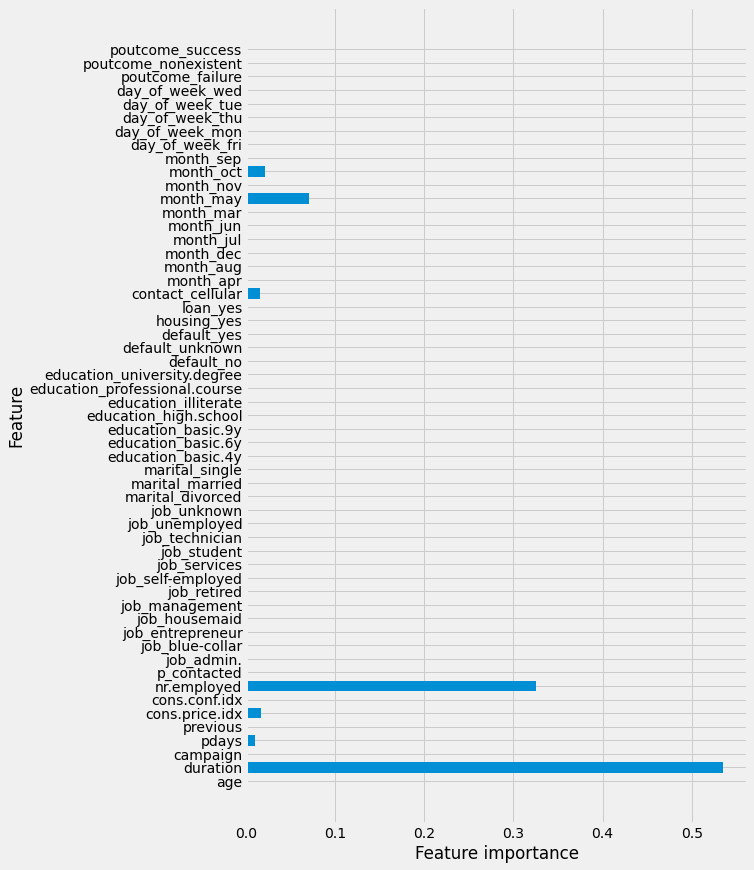

In [92]:
# create a funtion that takes model feature importances and plots them in a bar chart
def plot_feature_importances(model):
    n_features = scaled_data_train.shape[1]
    plt.figure(figsize=(8,14))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), scaled_df_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

<b>Observation:</b> It appears that our model was influenced by a small subset of our features, with `duration`, `nr.employed`, and `month_may` being among the most important.

In [93]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data

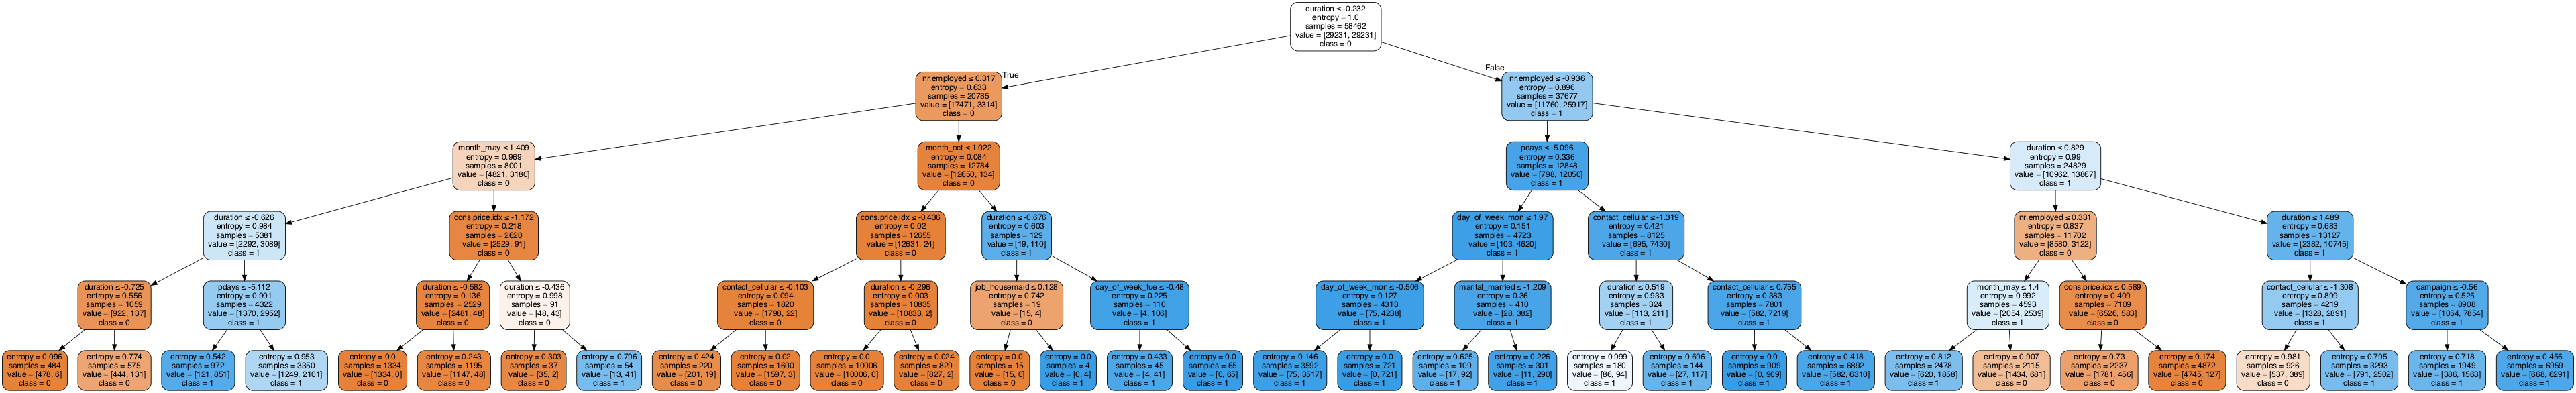

In [94]:
# Create DOT data
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=scaled_df_train.columns,  
                           class_names=np.unique(target).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

graph.set_size('"40,20!"')

# Show graph
Image(graph.create_png())

### Decision Tree Grid Search
For our decision tree models we will look at the following hyperparameters:

* criterion: The function to measure the quality of a split
* max_depth: The maximum depth of the tree.
* min_samples_split: The minimum number of samples required to split an internal node

In [95]:
# Create a parameter grid to identify optimal parameters
tree_param_grid = {'criterion':['gini', 'entropy'],
                   'max_depth':[3,4,5,None],
                   'min_samples_split': [5, 25, 50, 100]}

In [96]:
# fit the gridsearch to the tree classifier and prioritize recall
tree_clf_gs = GridSearchCV(tree_clf,
                          tree_param_grid,
                          scoring='recall', 
                          cv=3,
                          n_jobs=-1)

In [97]:
# fit the tree_clf_gs model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_dataset):
    model_results = add_model_results(model=tree_clf_gs,
                                      data=d,
                                      model_name="GridSearch-tree",
                                      data_name = modeling_dataset_names[i])
    print('GridSearch-tree: ', modeling_dataset_names[i])
    print('Best parameters: ', tree_clf_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], tree_clf_gs.predict(d['X_test'])), '\n')

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']    
model_results

GridSearch-tree:  orig_processed_data
Best parameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 5} 

[[6924  393]
 [ 424  497]] 

GridSearch-tree:  scaled_data
Best parameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 5} 

[[6924  393]
 [ 424  497]] 

GridSearch-tree:  SMOTE_data
Best parameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 5} 

[[5815 1502]
 [  65  856]] 



model                 data  train_accuracy  \
0       LogisticRegression  orig_processed_data           0.911   
1       LogisticRegression          scaled_data           0.911   
2       LogisticRegression           SMOTE_data           0.883   
3        GridSearch-logreg  orig_processed_data           0.867   
4        GridSearch-logreg          scaled_data           0.861   
5        GridSearch-logreg           SMOTE_data           0.883   
6     KNeighborsClassifier  orig_processed_data           0.932   
7     KNeighborsClassifier          scaled_data           0.920   
8     KNeighborsClassifier           SMOTE_data           0.947   
9   DecisionTreeClassifier  orig_processed_data           0.915   
10  DecisionTreeClassifier          scaled_data           0.915   
11  DecisionTreeClassifier           SMOTE_data           0.889   
12  DecisionTreeClassifier  orig_processed_data           0.915   
13  DecisionTreeClassifier          scaled_data           0.915   
14  DecisionTreeClassifier           SMOTE_data           0.889   
15         GridSearch-tree  orig_processed_data           0.910   
16         GridSearch-tree          scaled_data           0.910   
17         GridSearch-tree           SMOTE_data           0.878   

    test_accuracy  precision  recall  f1_score  acc_diff  
0           0.906      0.636   0.381     0.477     0.005  
1           0.910      0.655   0.413     0.506     0.001  
2           0.862      0.440   0.862     0.583     0.021  
3           0.867      0.449   0.858     0.590     0.000  
4           0.859      0.434   0.866     0.578     0.002  
5           0.862      0.440   0.862     0.583     0.021  
6           0.904      0.587   0.467     0.520     0.028  
7           0.897      0.572   0.318     0.409     0.023  
8           0.833      0.365   0.672     0.473     0.114  
9           0.911      0.634   0.474     0.543     0.004  
10          0.911      0.634   0.474     0.543     0.004  
11          0.844      0.409   0.890     0.561     0.045  
12          0.911      0.634   0.474     0.543     0.004  
13          0.911      0.634   0.474     0.543     0.004  
14          0.844      0.409   0.890     0.561     0.045  
15          0.901      0.558   0.540     0.549     0.009  
16          0.901      0.558   0.540     0.549     0.009  
17          0.810      0.363   0.929     0.522     0.068

### Decision Tree Grid Search Observations:
* There doesn't seem to be any risks of overfitting in this iteration, particularly the SMOTE data
* Results for original processed data and scaled data were the same using decision tree
* Entropy appears to be the best criterion with max depth set to 5 and min-sample split at 25
* Of these three, the original data appears to perform the best, but is not better than some of our previous models

Let's fit the model again with our chosen data and parameters and see what we are working with.

In [98]:
# set the optimal parameters for the tree clf and fit again
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5) 
tree_clf.fit(X=orig_processed_data['X_train'], y=orig_processed_data['y_train'])

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5)

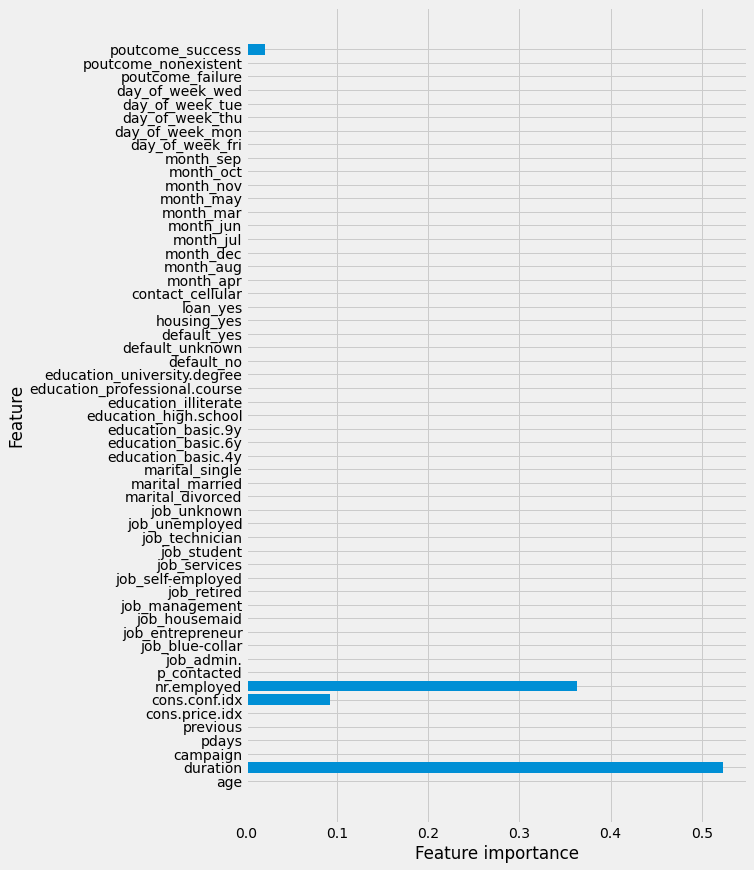

In [99]:
# plot feature importances for the last iteration of tree_clf
plot_feature_importances(tree_clf)

#### Observation
* `duration` and `nr.employed` continue to be the main influencers for the decision tree model

### Random Forest

In [100]:
# call our random forest classifier and establish baseline parameters
forest = RandomForestClassifier(n_estimators=100, max_depth=5)

In [101]:
# fit the forest model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_dataset):
    model_results = add_model_results(model=forest,
                                      data=d,
                                      model_name="RandomForestClassifier",
                                      data_name = modeling_dataset_names[i])
    print('RandomForestClassifier: ' + modeling_dataset_names[i])
    print(confusion_matrix(d['y_test'], forest.predict(d['X_test'])), '\n')
    
model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']    
model_results

RandomForestClassifier: orig_processed_data
[[7256   61]
 [ 750  171]] 

RandomForestClassifier: scaled_data
[[7257   60]
 [ 748  173]] 

RandomForestClassifier: SMOTE_data
[[6260 1057]
 [ 156  765]] 



model                 data  train_accuracy  \
0       LogisticRegression  orig_processed_data           0.911   
1       LogisticRegression          scaled_data           0.911   
2       LogisticRegression           SMOTE_data           0.883   
3        GridSearch-logreg  orig_processed_data           0.867   
4        GridSearch-logreg          scaled_data           0.861   
5        GridSearch-logreg           SMOTE_data           0.883   
6     KNeighborsClassifier  orig_processed_data           0.932   
7     KNeighborsClassifier          scaled_data           0.920   
8     KNeighborsClassifier           SMOTE_data           0.947   
9   DecisionTreeClassifier  orig_processed_data           0.915   
10  DecisionTreeClassifier          scaled_data           0.915   
11  DecisionTreeClassifier           SMOTE_data           0.889   
12  DecisionTreeClassifier  orig_processed_data           0.915   
13  DecisionTreeClassifier          scaled_data           0.915   
14  DecisionTreeClassifier           SMOTE_data           0.889   
15         GridSearch-tree  orig_processed_data           0.910   
16         GridSearch-tree          scaled_data           0.910   
17         GridSearch-tree           SMOTE_data           0.878   
18  RandomForestClassifier  orig_processed_data           0.902   
19  RandomForestClassifier          scaled_data           0.902   
20  RandomForestClassifier           SMOTE_data           0.899   

    test_accuracy  precision  recall  f1_score  acc_diff  
0           0.906      0.636   0.381     0.477     0.005  
1           0.910      0.655   0.413     0.506     0.001  
2           0.862      0.440   0.862     0.583     0.021  
3           0.867      0.449   0.858     0.590     0.000  
4           0.859      0.434   0.866     0.578     0.002  
5           0.862      0.440   0.862     0.583     0.021  
6           0.904      0.587   0.467     0.520     0.028  
7           0.897      0.572   0.318     0.409     0.023  
8           0.833      0.365   0.672     0.473     0.114  
9           0.911      0.634   0.474     0.543     0.004  
10          0.911      0.634   0.474     0.543     0.004  
11          0.844      0.409   0.890     0.561     0.045  
12          0.911      0.634   0.474     0.543     0.004  
13          0.911      0.634   0.474     0.543     0.004  
14          0.844      0.409   0.890     0.561     0.045  
15          0.901      0.558   0.540     0.549     0.009  
16          0.901      0.558   0.540     0.549     0.009  
17          0.810      0.363   0.929     0.522     0.068  
18          0.902      0.737   0.186     0.297     0.000  
19          0.902      0.742   0.188     0.300     0.000  
20          0.853      0.420   0.831     0.558     0.046

### Random Forest Observations:
* Interestingly the same behavior is present with original and scaled data performing almost exactly the same
* The accuracy of those models is fit very well, put the wrong metric is prioritized with high precision
* The SMOTE data has very high recall and and high F1, but has similar fit issues again. Let's see if we can tune parameters again to account for that.

Let's check feature importances before we move on to the grid search

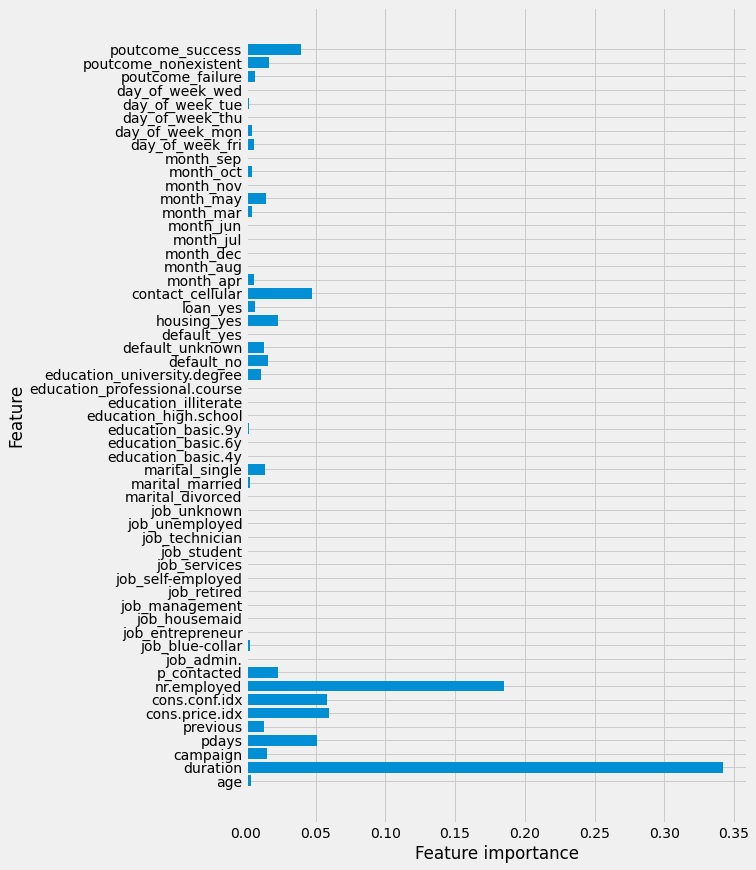

In [102]:
plot_feature_importances(forest)

#### Observations:

* `duration` and `nr.employed` remains the most important feature, but the importance is much more distributed now
* `contact_cellular` and `cons.conf.idx` have picked up significant importance

In [103]:
forest_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 9, 12],
    'min_samples_split': [5, 10, 25, 50],
    'min_samples_leaf': [3, 6, 12]}

In [104]:
# Instantiate GridSearchCV
forest_gs = GridSearchCV(forest, 
                         forest_param_grid,
                         cv=3,
                         scoring='recall',
                         n_jobs=-1)

In [105]:
# fit the forest_gs model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_dataset):
    model_results = add_model_results(model=forest_gs,
                                      data=d,
                                      model_name="GridSearch-forest",
                                      data_name = modeling_dataset_names[i])
    print('GridSearch-forest: ', modeling_dataset_names[i])
    print('Best parameters: ',  forest_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], forest_gs.predict(d['X_test'])), '\n')

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']    
model_results

GridSearch-forest:  orig_processed_data
Best parameters:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 10} 

[[7156  161]
 [ 588  333]] 

GridSearch-forest:  scaled_data
Best parameters:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 10} 

[[7151  166]
 [ 583  338]] 

GridSearch-forest:  SMOTE_data
Best parameters:  {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 25, 'n_estimators': 30} 

[[6493  824]
 [ 163  758]] 



model                 data  train_accuracy  \
0       LogisticRegression  orig_processed_data           0.911   
1       LogisticRegression          scaled_data           0.911   
2       LogisticRegression           SMOTE_data           0.883   
3        GridSearch-logreg  orig_processed_data           0.867   
4        GridSearch-logreg          scaled_data           0.861   
5        GridSearch-logreg           SMOTE_data           0.883   
6     KNeighborsClassifier  orig_processed_data           0.932   
7     KNeighborsClassifier          scaled_data           0.920   
8     KNeighborsClassifier           SMOTE_data           0.947   
9   DecisionTreeClassifier  orig_processed_data           0.915   
10  DecisionTreeClassifier          scaled_data           0.915   
11  DecisionTreeClassifier           SMOTE_data           0.889   
12  DecisionTreeClassifier  orig_processed_data           0.915   
13  DecisionTreeClassifier          scaled_data           0.915   
14  DecisionTreeClassifier           SMOTE_data           0.889   
15         GridSearch-tree  orig_processed_data           0.910   
16         GridSearch-tree          scaled_data           0.910   
17         GridSearch-tree           SMOTE_data           0.878   
18  RandomForestClassifier  orig_processed_data           0.902   
19  RandomForestClassifier          scaled_data           0.902   
20  RandomForestClassifier           SMOTE_data           0.899   
21       GridSearch-forest  orig_processed_data           0.926   
22       GridSearch-forest          scaled_data           0.925   
23       GridSearch-forest           SMOTE_data           0.935   

    test_accuracy  precision  recall  f1_score  acc_diff  
0           0.906      0.636   0.381     0.477     0.005  
1           0.910      0.655   0.413     0.506     0.001  
2           0.862      0.440   0.862     0.583     0.021  
3           0.867      0.449   0.858     0.590     0.000  
4           0.859      0.434   0.866     0.578     0.002  
5           0.862      0.440   0.862     0.583     0.021  
6           0.904      0.587   0.467     0.520     0.028  
7           0.897      0.572   0.318     0.409     0.023  
8           0.833      0.365   0.672     0.473     0.114  
9           0.911      0.634   0.474     0.543     0.004  
10          0.911      0.634   0.474     0.543     0.004  
11          0.844      0.409   0.890     0.561     0.045  
12          0.911      0.634   0.474     0.543     0.004  
13          0.911      0.634   0.474     0.543     0.004  
14          0.844      0.409   0.890     0.561     0.045  
15          0.901      0.558   0.540     0.549     0.009  
16          0.901      0.558   0.540     0.549     0.009  
17          0.810      0.363   0.929     0.522     0.068  
18          0.902      0.737   0.186     0.297     0.000  
19          0.902      0.742   0.188     0.300     0.000  
20          0.853      0.420   0.831     0.558     0.046  
21          0.909      0.674   0.362     0.471     0.017  
22          0.909      0.671   0.367     0.474     0.016  
23          0.880      0.479   0.823     0.606     0.055

#### Observations:

* We have fairly high and close train and test accuracy, suggesting that our models are not overfit
* Recall and F1 are continuing to improve but recall is not as high as logreg
	- SMOTE still appears to be our best performing dataset for recall and F1
	- The original and scaled data accuracy is also less impressive once you consider the class imbalance

Let's apply the parameters we found in our last grid search to the model so that we can take a look at which features it is prioritizing.

In [106]:
forest = RandomForestClassifier(criterion='entropy', 
                                max_depth=12,
                                min_samples_leaf=6,
                                min_samples_split=10,
                                n_estimators=30)
forest.fit(X=SMOTE_data['X_train'], y=SMOTE_data['y_train'] )

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=6,
                       min_samples_split=10, n_estimators=30)

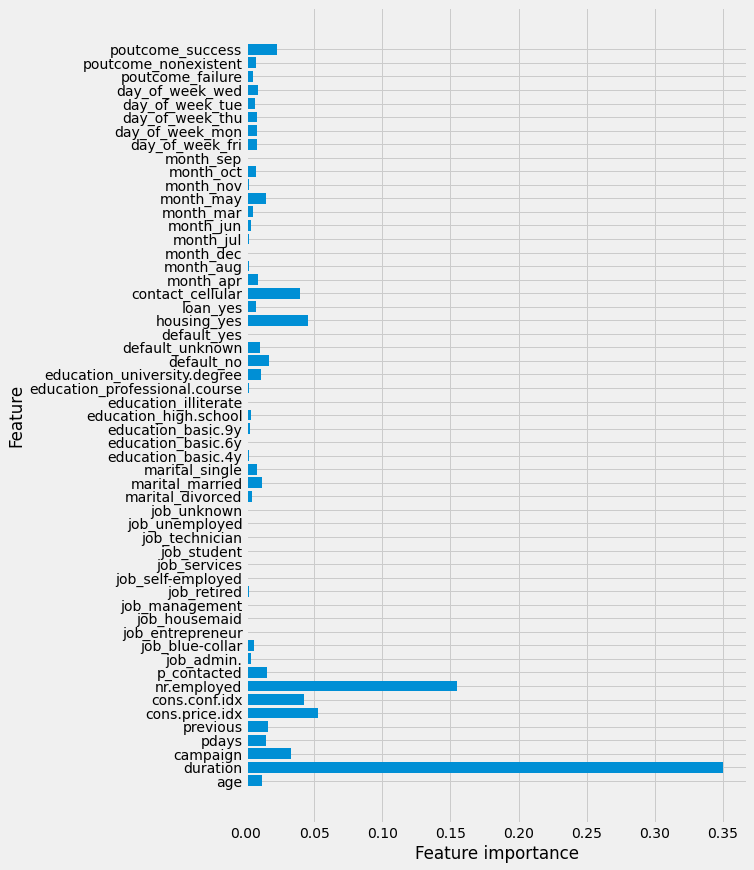

In [107]:
plot_feature_importances(forest)

#### Observations:

* Similar to before `duration` and `nr.employed` remain the most important features

### Support Vector Machine
The SVM classifier will be the final model we try. SVM attempts to find the decision boundary which maximizes the distance between the boundary and the training observations. This model includes a parameter (C), which specifies the balance between finding this optimal boundary for most datapoints, and misclassifying observations.

In [108]:
svm_clf = SVC(gamma='auto', random_state=175)

In [109]:
# fit the svm_clf model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_dataset):
    model_results = add_model_results(model=svm_clf,
                                      data=d,
                                      model_name="SVC",
                                      data_name = modeling_dataset_names[i])
    print('SVC: ' + modeling_dataset_names[i])
    print(confusion_matrix(d['y_test'], svm_clf.predict(d['X_test'])), '\n')
    
model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']    
model_results.tail()

SVC: orig_processed_data
[[7146  171]
 [ 685  236]] 

SVC: scaled_data
[[7113  204]
 [ 557  364]] 

SVC: SMOTE_data
[[6552  765]
 [ 234  687]] 



model                 data  train_accuracy  test_accuracy  \
22  GridSearch-forest          scaled_data           0.925          0.909   
23  GridSearch-forest           SMOTE_data           0.935          0.880   
24                SVC  orig_processed_data           0.962          0.896   
25                SVC          scaled_data           0.930          0.908   
26                SVC           SMOTE_data           0.948          0.879   

    precision  recall  f1_score  acc_diff  
22      0.671   0.367     0.474     0.016  
23      0.479   0.823     0.606     0.055  
24      0.580   0.256     0.355     0.066  
25      0.641   0.395     0.489     0.022  
26      0.473   0.746     0.579     0.069

#### SVM Observations:
* SMOTE data again appears to get us the best recall and F1
* accuracy is slightly lower than previous models
* It's seems like a trend at this point that SMOTE will be getting us the best results for the metric we are prioritizing

### SVM Grid Search
This model includes a parameter (C), which specifies the balance between finding this optimal boundary for most datapoints, and misclassifying observations.

We'll continue to only look at our SMOTE data, as that still seems to gain our best performance.

In [110]:
# Specify the parameter grid to be used during the GridSearchCV
svm_param_grid = {'C':[1,5,10],
                'class_weight':['balanced', None]}


In [111]:
# fit the gridsearch to the tree classifier and prioritize recall
svm_gs_clf = GridSearchCV(svm_clf, 
                          svm_param_grid,
                          scoring='recall',
                          cv=3,
                          n_jobs=-1)


In [112]:
# fit the svm_gs_clf model to the SMOTE data and show the results
model_results = add_model_results(model=svm_gs_clf, 
                                  data=SMOTE_data, 
                                  model_name='GridSearch-SVM',
                                  data_name='SMOTE_data')

print('Best parameters: ',  svm_gs_clf.best_params_, '\n')
print(confusion_matrix(SMOTE_data['y_test'], 
                       svm_gs_clf.predict(SMOTE_data['X_test'])), '\n')

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']
model_results.tail()

Best parameters:  {'C': 5, 'class_weight': 'balanced'} 

[[6737  580]
 [ 346  575]] 



model                 data  train_accuracy  test_accuracy  \
23  GridSearch-forest           SMOTE_data           0.935          0.880   
24                SVC  orig_processed_data           0.962          0.896   
25                SVC          scaled_data           0.930          0.908   
26                SVC           SMOTE_data           0.948          0.879   
27     GridSearch-SVM           SMOTE_data           0.972          0.888   

    precision  recall  f1_score  acc_diff  
23      0.479   0.823     0.606     0.055  
24      0.580   0.256     0.355     0.066  
25      0.641   0.395     0.489     0.022  
26      0.473   0.746     0.579     0.069  
27      0.498   0.624     0.554     0.084

#### SVM Grid Search Observations
* Grid search appears to have lowered our priority metrics
* The gap between train and test accuracy is larger as well, suggesting that we did not tune the right parameters for this model and that it is potentially overfit

### XGBoost
The next model we will work with is XGBoost.  This method uses a boosting technique to iteratively make guesses that are slightly better than random chance. Then, the model attempts to figure out which examples it got wrong and refocuses on trying to improve those areas in subsequent iterations. It continues this process until it reaches a set stopping point.

In [113]:
# this script is necessary to run to keep XGBoost from killing the kernal
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [114]:
# Instantiate XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [115]:
# fit the xgb_clf model to the original data and show the confusion matrix 
i=0
d=modeling_dataset[i]

model_results = add_model_results(model=xgb_clf,
                                  data=d,
                                  model_name="XGBClassifier",
                                  data_name = modeling_dataset_names[i])

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']
print('XGB-Clf: ' + modeling_dataset_names[i])
print(confusion_matrix(d['y_test'], xgb_clf.predict(d['X_test'])), '\n')

[15:43:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB-Clf: orig_processed_data
[[7034  283]
 [ 438  483]] 



In [116]:
# fit the xgb_clf model to the scaled data and show the confusion matrix 
i=1
d=modeling_dataset[i]

model_results = add_model_results(model=xgb_clf,
                                  data=d,
                                  model_name="XGBClassifier",
                                  data_name = modeling_dataset_names[i])

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']
print('XGB-Clf: ' + modeling_dataset_names[i])
print(confusion_matrix(d['y_test'], xgb_clf.predict(d['X_test'])), '\n')

[15:43:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB-Clf: scaled_data
[[7034  283]
 [ 438  483]] 



In [117]:
# fit the xgb_clf model to the SMOTE data and show the confusion matrix 
i=2
d=modeling_dataset[i]

model_results = add_model_results(model=xgb_clf,
                                  data=d,
                                  model_name="XGBClassifier",
                                  data_name = modeling_dataset_names[i])

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']
print('XGB-Clf: ' + modeling_dataset_names[i])
print(confusion_matrix(d['y_test'], xgb_clf.predict(d['X_test'])), '\n')

[15:43:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB-Clf: SMOTE_data
[[6982  335]
 [ 415  506]] 



In [118]:
model_results

model                 data  train_accuracy  \
0       LogisticRegression  orig_processed_data           0.911   
1       LogisticRegression          scaled_data           0.911   
2       LogisticRegression           SMOTE_data           0.883   
3        GridSearch-logreg  orig_processed_data           0.867   
4        GridSearch-logreg          scaled_data           0.861   
5        GridSearch-logreg           SMOTE_data           0.883   
6     KNeighborsClassifier  orig_processed_data           0.932   
7     KNeighborsClassifier          scaled_data           0.920   
8     KNeighborsClassifier           SMOTE_data           0.947   
9   DecisionTreeClassifier  orig_processed_data           0.915   
10  DecisionTreeClassifier          scaled_data           0.915   
11  DecisionTreeClassifier           SMOTE_data           0.889   
12  DecisionTreeClassifier  orig_processed_data           0.915   
13  DecisionTreeClassifier          scaled_data           0.915   
14  DecisionTreeClassifier           SMOTE_data           0.889   
15         GridSearch-tree  orig_processed_data           0.910   
16         GridSearch-tree          scaled_data           0.910   
17         GridSearch-tree           SMOTE_data           0.878   
18  RandomForestClassifier  orig_processed_data           0.902   
19  RandomForestClassifier          scaled_data           0.902   
20  RandomForestClassifier           SMOTE_data           0.899   
21       GridSearch-forest  orig_processed_data           0.926   
22       GridSearch-forest          scaled_data           0.925   
23       GridSearch-forest           SMOTE_data           0.935   
24                     SVC  orig_processed_data           0.962   
25                     SVC          scaled_data           0.930   
26                     SVC           SMOTE_data           0.948   
27          GridSearch-SVM           SMOTE_data           0.972   
28           XGBClassifier  orig_processed_data           0.957   
29           XGBClassifier          scaled_data           0.957   
30           XGBClassifier           SMOTE_data           0.974   

    test_accuracy  precision  recall  f1_score  acc_diff  
0           0.906      0.636   0.381     0.477     0.005  
1           0.910      0.655   0.413     0.506     0.001  
2           0.862      0.440   0.862     0.583     0.021  
3           0.867      0.449   0.858     0.590     0.000  
4           0.859      0.434   0.866     0.578     0.002  
5           0.862      0.440   0.862     0.583     0.021  
6           0.904      0.587   0.467     0.520     0.028  
7           0.897      0.572   0.318     0.409     0.023  
8           0.833      0.365   0.672     0.473     0.114  
9           0.911      0.634   0.474     0.543     0.004  
10          0.911      0.634   0.474     0.543     0.004  
11          0.844      0.409   0.890     0.561     0.045  
12          0.911      0.634   0.474     0.543     0.004  
13          0.911      0.634   0.474     0.543     0.004  
14          0.844      0.409   0.890     0.561     0.045  
15          0.901      0.558   0.540     0.549     0.009  
16          0.901      0.558   0.540     0.549     0.009  
17          0.810      0.363   0.929     0.522     0.068  
18          0.902      0.737   0.186     0.297     0.000  
19          0.902      0.742   0.188     0.300     0.000  
20          0.853      0.420   0.831     0.558     0.046  
21          0.909      0.674   0.362     0.471     0.017  
22          0.909      0.671   0.367     0.474     0.016  
23          0.880      0.479   0.823     0.606     0.055  
24          0.896      0.580   0.256     0.355     0.066  
25          0.908      0.641   0.395     0.489     0.022  
26          0.879      0.473   0.746     0.579     0.069  
27          0.888      0.498   0.624     0.554     0.084  
28          0.912      0.631   0.524     0.573     0.045  
29          0.912      0.631   0.524     0.573     0.045  
30          0.909      0.602   0.549     0.574 

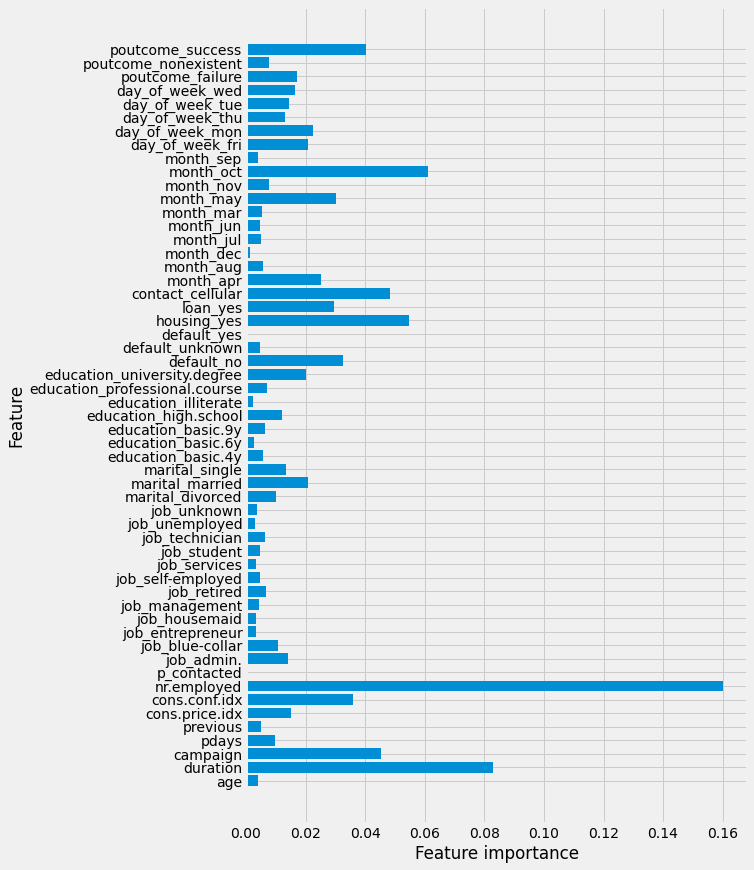

In [119]:
plot_feature_importances(xgb_clf)

#### XGBoost Observations:

* While we're seeing good performance with the baseline model parameters, they are not much better thnt what we've seen previously. Maybe we can improve performance with grid search
* SMOTE data seems to consistently be the best performing for our priority metrics at this point, so we will only give that a look in our grid search
* It's very interesting that this model prioritized new features, specifically the importance of `housing_yes` and `month_oct`
* `nr.employed` and `duration` are still the most important


### XGBoost Grid Search
The parameters we will explore are:

* learning_rate: Step size shrinkage used to prevent overfitting.
* max_depth: Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.
* min_child_weight: Minimum sum of instance weight needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. The larger the more conservative the model is
* subsample: Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting.

In [120]:
xgb_clf2 = XGBClassifier(base_score=0.5,
                         booster='gbtree',
                         colsample_bytree=1,
                         eval_metric='auc',
                         gamma=0,
                         importance_type='gain',
                         learning_rate=0.3,
                         max_depth=2, 
                         min_child_weight=1, 
                         n_estimators=100, 
                         random_state=1502, 
                         subsample=1,
                         verbosity=0,
                         objective='binary:logistic')

xgb_clf2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.3,
              max_delta_step=None, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1502, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=None, verbosity=0)

In [121]:
# fit the xgb_clf2 model to the original data with preset params and show the confusion matrix 
i=0
d=modeling_dataset[i]

model_results = add_model_results(model=xgb_clf2,
                                  data=d,
                                  model_name="XGBClassifier2",
                                  data_name = modeling_dataset_names[i])

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']
print('XGB-Clf2: ' + modeling_dataset_names[i])
print(confusion_matrix(d['y_test'], xgb_clf2.predict(d['X_test'])), '\n')

XGB-Clf2: orig_processed_data
[[7080  237]
 [ 477  444]] 



In [122]:
# fit the xgb_clf2 model to the scaled data with preset params and show the confusion matrix 
i=1
d=modeling_dataset[i]

model_results = add_model_results(model=xgb_clf2,
                                  data=d,
                                  model_name="XGBClassifier2",
                                  data_name = modeling_dataset_names[i])

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']
print('XGB-Clf2: ' + modeling_dataset_names[i])
print(confusion_matrix(d['y_test'], xgb_clf2.predict(d['X_test'])), '\n')

XGB-Clf2: scaled_data
[[7080  237]
 [ 477  444]] 



In [123]:
# fit the xgb_clf2 model to the SMOTE data with preset params and show the confusion matrix 
i=2
d=modeling_dataset[i]

model_results = add_model_results(model=xgb_clf2,
                                  data=d,
                                  model_name="XGBClassifier2",
                                  data_name = modeling_dataset_names[i])

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']
print('XGB-Clf2: ' + modeling_dataset_names[i])
print(confusion_matrix(d['y_test'], xgb_clf2.predict(d['X_test'])), '\n')

XGB-Clf2: SMOTE_data
[[6906  411]
 [ 341  580]] 



In [124]:
model_results

model                 data  train_accuracy  \
0       LogisticRegression  orig_processed_data           0.911   
1       LogisticRegression          scaled_data           0.911   
2       LogisticRegression           SMOTE_data           0.883   
3        GridSearch-logreg  orig_processed_data           0.867   
4        GridSearch-logreg          scaled_data           0.861   
5        GridSearch-logreg           SMOTE_data           0.883   
6     KNeighborsClassifier  orig_processed_data           0.932   
7     KNeighborsClassifier          scaled_data           0.920   
8     KNeighborsClassifier           SMOTE_data           0.947   
9   DecisionTreeClassifier  orig_processed_data           0.915   
10  DecisionTreeClassifier          scaled_data           0.915   
11  DecisionTreeClassifier           SMOTE_data           0.889   
12  DecisionTreeClassifier  orig_processed_data           0.915   
13  DecisionTreeClassifier          scaled_data           0.915   
14  DecisionTreeClassifier           SMOTE_data           0.889   
15         GridSearch-tree  orig_processed_data           0.910   
16         GridSearch-tree          scaled_data           0.910   
17         GridSearch-tree           SMOTE_data           0.878   
18  RandomForestClassifier  orig_processed_data           0.902   
19  RandomForestClassifier          scaled_data           0.902   
20  RandomForestClassifier           SMOTE_data           0.899   
21       GridSearch-forest  orig_processed_data           0.926   
22       GridSearch-forest          scaled_data           0.925   
23       GridSearch-forest           SMOTE_data           0.935   
24                     SVC  orig_processed_data           0.962   
25                     SVC          scaled_data           0.930   
26                     SVC           SMOTE_data           0.948   
27          GridSearch-SVM           SMOTE_data           0.972   
28           XGBClassifier  orig_processed_data           0.957   
29           XGBClassifier          scaled_data           0.957   
30           XGBClassifier           SMOTE_data           0.974   
31          XGBClassifier2  orig_processed_data           0.921   
32          XGBClassifier2          scaled_data           0.921   
33          XGBClassifier2           SMOTE_data           0.946   

    test_accuracy  precision  recall  f1_score  acc_diff  
0           0.906      0.636   0.381     0.477     0.005  
1           0.910      0.655   0.413     0.506     0.001  
2           0.862      0.440   0.862     0.583     0.021  
3           0.867      0.449   0.858     0.590     0.000  
4           0.859      0.434   0.866     0.578     0.002  
5           0.862      0.440   0.862     0.583     0.021  
6           0.904      0.587   0.467     0.520     0.028  
7           0.897      0.572   0.318     0.409     0.023  
8           0.833      0.365   0.672     0.473     0.114  
9           0.911      0.634   0.474     0.543     0.004  
10          0.911      0.634   0.474     0.543     0.004  
11          0.844      0.409   0.890     0.561     0.045  
12          0.911      0.634   0.474     0.543     0.004  
13          0.911      0.634   0.474     0.543     0.004  
14          0.844      0.409   0.890     0.561     0.045  
15          0.901      0.558   0.540     0.549     0.009  
16          0.901      0.558   0.540     0.549     0.009  
17          0.810      0.363   0.929     0.522     0.068  
18          0.902      0.737   0.186     0.297     0.000  
19          0.902      0.742   0.188     0.300     0.000  
20          0.853      0.420   0.831     0.558     0.046  
21          0.909      0.674   0.362     0.471     0.017  
22          0.909      0.671   0.367     0.474     0.016  
23          0.880      0.479   0.823     0.606     0.055  
24          0.896      0.580   0.256     0.355     0.066  
25          0.908      0.641   0.395     0.489     0.022  
26          0.879      0.473   0.746     0.579     0.069  
27          0.888      

#### XGBoost Observations:
* With some preset parameters, we see that XGB model attained the highest F1 score compared to all other models
* SMOTE data performed the best overall
* We also observe higher accuracy in both training and test sets, a good sign of not being overfit
* Recall is not as high as logreg, but we can certainly adjust the cutoff threshold below 0.5 if we care more about getting a higher recall

#### XGBoost Grid Search Tackle plan
* Let's experiment with XGB hyperparameters on separate phases to help reduce computation time:
    - Take the best parameters from phase 1 and apply them in phase 2
    - Focus on the SMOTE data since that set yielded the best performance

In [125]:
#checking how many cores we have
import multiprocessing
multiprocessing.cpu_count()

8

In [126]:
#setting the cross validation parameters
from sklearn.model_selection import KFold

tune_control = KFold(n_splits = 5,
                     shuffle = True,
                     random_state = 1502).split(X = SMOTE_data['X_train'],
                                                y = SMOTE_data['y_train'])
                                                

In [127]:
#set parameter tuning
#set the parameters phase 1
tune_grid = {'base_score': [0.5],
             'booster': ['gbtree'],
             'colsample_bytree': [0.5, 1], #search phase 1
             'eval_metric': ['auc'],
             'gamma': [0],
             'importance_type': ['gain'],
             'learning_rate': [0.05, 0.3], #search phase 1
             'max_depth': range(2, 9, 2), #search phase 1
             'min_child_weight': [1],
             'n_estimators': range(200, 2000, 200), #search phase 1
             'random_state': [1502],
             'subsample': [1],
             'verbosity': [0],
             'objective': ['binary:logistic']}  

In [128]:
#State that we are doing a classification problem
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

classifier = XGBClassifier(objective = "binary:logistic")

#Cross Validation Assembly
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = tune_grid,
                           scoring = "roc_auc",
                           n_jobs = 6,
                           cv = tune_control,
                           verbose = 5)

In [129]:
#Setting evaluation parameters
evaluation_parameters = {"early_stopping_rounds": 100,
                         "eval_metric": "auc",
                         "eval_set": [(SMOTE_data['X_test'], SMOTE_data['y_test'])]}

In [131]:
# Run hyperparameter tuning phase 1 and cross validation against SMOTE dataset
# Uncomment cells below to rerun pass1 (2 hours to run)
#
#tune_model = grid_search.fit(X = SMOTE_data['X_train'],
#                             y = SMOTE_data['y_train'],
#                             **evaluation_parameters)

#print('GridSearch-XGB: ', modeling_dataset_names[i])
#print('Best parameters: ',  grid_search.best_params_, '\n')
#print('Best score: ',  grid_search.best_score_, '\n')


#### 

In [132]:
# Best parameters from XGBoost grid search on SMOTE data phase 1
xgb_clf3 = XGBClassifier(base_score=0.5,
                         booster='gbtree',
                         colsample_bytree=0.5,
                         eval_metric='auc',
                         gamma=0,
                         importance_type='gain',
                         learning_rate=0.05,
                         max_depth=8, 
                         min_child_weight=1, 
                         n_estimators=400, 
                         random_state=1502, 
                         subsample=1,
                         verbosity=0,
                         objective='binary:logistic')
xgb_clf3

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.5, eval_metric='auc',
              gamma=0, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.05,
              max_delta_step=None, max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=1502, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=None, verbosity=0)

In [133]:
# fit the xgb_clf3 model to the SMOTE data with best params and show the confusion matrix 
i=2
d=modeling_dataset[i]

model_results = add_model_results(model=xgb_clf3,
                                  data=d,
                                  model_name="XGBClassifier3",
                                  data_name = modeling_dataset_names[i])

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']
print('XGB-Clf3: ' + modeling_dataset_names[i])
print(confusion_matrix(d['y_test'], xgb_clf3.predict(d['X_test'])), '\n')

XGB-Clf3: SMOTE_data
[[7000  317]
 [ 411  510]] 



In [134]:
model_results

model                 data  train_accuracy  \
0       LogisticRegression  orig_processed_data           0.911   
1       LogisticRegression          scaled_data           0.911   
2       LogisticRegression           SMOTE_data           0.883   
3        GridSearch-logreg  orig_processed_data           0.867   
4        GridSearch-logreg          scaled_data           0.861   
5        GridSearch-logreg           SMOTE_data           0.883   
6     KNeighborsClassifier  orig_processed_data           0.932   
7     KNeighborsClassifier          scaled_data           0.920   
8     KNeighborsClassifier           SMOTE_data           0.947   
9   DecisionTreeClassifier  orig_processed_data           0.915   
10  DecisionTreeClassifier          scaled_data           0.915   
11  DecisionTreeClassifier           SMOTE_data           0.889   
12  DecisionTreeClassifier  orig_processed_data           0.915   
13  DecisionTreeClassifier          scaled_data           0.915   
14  DecisionTreeClassifier           SMOTE_data           0.889   
15         GridSearch-tree  orig_processed_data           0.910   
16         GridSearch-tree          scaled_data           0.910   
17         GridSearch-tree           SMOTE_data           0.878   
18  RandomForestClassifier  orig_processed_data           0.902   
19  RandomForestClassifier          scaled_data           0.902   
20  RandomForestClassifier           SMOTE_data           0.899   
21       GridSearch-forest  orig_processed_data           0.926   
22       GridSearch-forest          scaled_data           0.925   
23       GridSearch-forest           SMOTE_data           0.935   
24                     SVC  orig_processed_data           0.962   
25                     SVC          scaled_data           0.930   
26                     SVC           SMOTE_data           0.948   
27          GridSearch-SVM           SMOTE_data           0.972   
28           XGBClassifier  orig_processed_data           0.957   
29           XGBClassifier          scaled_data           0.957   
30           XGBClassifier           SMOTE_data           0.974   
31          XGBClassifier2  orig_processed_data           0.921   
32          XGBClassifier2          scaled_data           0.921   
33          XGBClassifier2           SMOTE_data           0.946   
34          XGBClassifier3           SMOTE_data           0.978   

    test_accuracy  precision  recall  f1_score  acc_diff  
0           0.906      0.636   0.381     0.477     0.005  
1           0.910      0.655   0.413     0.506     0.001  
2           0.862      0.440   0.862     0.583     0.021  
3           0.867      0.449   0.858     0.590     0.000  
4           0.859      0.434   0.866     0.578     0.002  
5           0.862      0.440   0.862     0.583     0.021  
6           0.904      0.587   0.467     0.520     0.028  
7           0.897      0.572   0.318     0.409     0.023  
8           0.833      0.365   0.672     0.473     0.114  
9           0.911      0.634   0.474     0.543     0.004  
10          0.911      0.634   0.474     0.543     0.004  
11          0.844      0.409   0.890     0.561     0.045  
12          0.911      0.634   0.474     0.543     0.004  
13          0.911      0.634   0.474     0.543     0.004  
14          0.844      0.409   0.890     0.561     0.045  
15          0.901      0.558   0.540     0.549     0.009  
16          0.901      0.558   0.540     0.549     0.009  
17          0.810      0.363   0.929     0.522     0.068  
18          0.902      0.737   0.186     0.297     0.000  
19          0.902      0.742   0.188     0.300     0.000  
20          0.853      0.420   0.831     0.558     0.046  
21          0.909      0.674   0.362     0.471     0.017  
22          0.909      0.671   0.367     0.474     0.016  
23          0.880      0.479   0.823     0.606     0.055  
24          0.896      0.580   0.256     0.355     0.066  
25          0.908      0.641   0.395     0.489     0.022  
26          0.8

#### XGBoost Gridsearch Observations
* Performing XGBoost with tuned parameters scored the highest accuracy for both test and train for SMOTE data, suggesting we did not overfit the data
* But recall is still outperformed by decision tree and logreg
* The XGBoost model seems promising because we can have the best overall accuracy, espeically if we care about optimizing both precision and recall (optimizing potential sales and minimizing unnecessary expenses)

In [135]:
#setting the cross validation parameters
from sklearn.model_selection import KFold

tune_control = KFold(n_splits = 5,
                     shuffle = True,
                     random_state = 1502).split(X = SMOTE_data['X_train'],
                                                y = SMOTE_data['y_train'])
                                                

In [136]:
#set parameter tuning
#set the parameters phase 2
tune_grid2 = {'base_score': [0.5],
             'booster': ['gbtree'],
             'colsample_bytree': [0.5],
             'eval_metric': ['auc'],
             'gamma': [0, 0.1], #search phase 2 
             'importance_type': ['gain'],
             'learning_rate': [0.05],
             'max_depth': [8],
             'min_child_weight': range(1,5,1), #search phase 2 
             'n_estimators': range(200, 2000, 200), #search phase 2 
             'random_state': [1502],
             'subsample': [1],
             'verbosity': [0],
             'objective': ['binary:logistic']}  

In [137]:
#State that we are doing a classification problem
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

classifier2 = XGBClassifier(objective = "binary:logistic")

#Cross Validation Assembly
grid_search2 = GridSearchCV(estimator = classifier2,
                           param_grid = tune_grid2,
                           scoring = "roc_auc",
                           n_jobs = 6,
                           cv = tune_control,
                           verbose = 5)

In [138]:
#Setting evaluation parameters
evaluation_parameters = {"early_stopping_rounds": 100,
                         "eval_metric": "auc",
                         "eval_set": [(SMOTE_data['X_test'], SMOTE_data['y_test'])]}

In [139]:
# Run hyperparameter tuning phase 2 and cross validation against SMOTE dataset
# Uncomment cells below to rerun pass2 (2 hours to run)

#tune_model2 = grid_search2.fit(X = SMOTE_data['X_train'],
#                             y = SMOTE_data['y_train'],
#                             **evaluation_parameters)

#print('GridSearch-XGB2: ', modeling_dataset_names[i])
#print('Best parameters: ',  grid_search2.best_params_, '\n')
#print('Best score: ', grid_search2.best_score_,'\n')

In [140]:
# rerun XGBoost model with best hyperparamaters
xgb_clf4 = XGBClassifier(base_score=0.5,
                         booster='gbtree',
                         colsample_bytree=0.5,
                         eval_metric='auc',
                         gamma=0.1,
                         importance_type='gain',
                         learning_rate=0.05,
                         max_depth=8, 
                         min_child_weight=1, 
                         n_estimators=400, 
                         random_state=1502, 
                         subsample=1,
                         verbosity=0,
                         objective='binary:logistic')
xgb_clf4

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.5, eval_metric='auc',
              gamma=0.1, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.05,
              max_delta_step=None, max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=1502, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=None, verbosity=0)

In [141]:
# fit the xgb_clf4 model to the original data with preset params and show the confusion matrix 
i=0
d=modeling_dataset[i]

model_results = add_model_results(model=xgb_clf4,
                                  data=d,
                                  model_name="XGBClassifier4",
                                  data_name = modeling_dataset_names[i])

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']
print('XGB-Clf4: ' + modeling_dataset_names[i])
print(confusion_matrix(d['y_test'], xgb_clf4.predict(d['X_test'])), '\n')

XGB-Clf4: orig_processed_data
[[7059  258]
 [ 445  476]] 



In [143]:
# fit the xgb_clf4 model to the scaled data with best params and show the confusion matrix 
i=1
d=modeling_dataset[i]

model_results = add_model_results(model=xgb_clf4,
                                  data=d,
                                  model_name="XGBClassifier4",
                                  data_name = modeling_dataset_names[i])

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']
print('XGB-Clf4: ' + modeling_dataset_names[i])
print(confusion_matrix(d['y_test'], xgb_clf4.predict(d['X_test'])), '\n')

XGB-Clf4: scaled_data
[[7059  258]
 [ 445  476]] 



In [144]:
# fit the xgb_clf4 model to the SMOTE data with best params and show the confusion matrix 
i=2
d=modeling_dataset[i]

model_results = add_model_results(model=xgb_clf4,
                                  data=d,
                                  model_name="XGBClassifier4",
                                  data_name = modeling_dataset_names[i])

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']
print('XGB-Clf4: ' + modeling_dataset_names[i])
print(confusion_matrix(d['y_test'], xgb_clf4.predict(d['X_test'])), '\n')
report = classification_report(d['y_test'], xgb_clf4.predict(d['X_test']))
print(report)

XGB-Clf4: SMOTE_data
[[6997  320]
 [ 397  524]] 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7317
           1       0.62      0.57      0.59       921

    accuracy                           0.91      8238
   macro avg       0.78      0.76      0.77      8238
weighted avg       0.91      0.91      0.91      8238



In [145]:
#add difference between train vs test accuracy to evaluate further
model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']

In [225]:
ds_filter = 'SMOTE_data'
metric_order = ['test_accuracy', 'acc_diff', 'recall', 'f1_score',]
sort_ascending = [False, True, False, False]

#metric_order = ['test_accuracy', 'acc_diff', 'recall', 'f1_score' ]
#sort_ascending = [False, True, False, False]

#metric_order = ['recall', 'test_accuracy', 'acc_diff', 'f1_score']
#sort_ascending = [False, False, True, False]

rank_models = model_results.loc[model_results.data == ds_filter].sort_values(
    by=metric_order, ascending=sort_ascending)

rank_models

model        data  train_accuracy  test_accuracy  \
38          XGBClassifier4  SMOTE_data           0.979          0.913   
34          XGBClassifier3  SMOTE_data           0.978          0.912   
33          XGBClassifier2  SMOTE_data           0.946          0.909   
30           XGBClassifier  SMOTE_data           0.974          0.909   
27          GridSearch-SVM  SMOTE_data           0.972          0.888   
23       GridSearch-forest  SMOTE_data           0.935          0.880   
26                     SVC  SMOTE_data           0.948          0.879   
2       LogisticRegression  SMOTE_data           0.883          0.862   
5        GridSearch-logreg  SMOTE_data           0.883          0.862   
20  RandomForestClassifier  SMOTE_data           0.899          0.853   
11  DecisionTreeClassifier  SMOTE_data           0.889          0.844   
14  DecisionTreeClassifier  SMOTE_data           0.889          0.844   
8     KNeighborsClassifier  SMOTE_data           0.947          0.833   
17         GridSearch-tree  SMOTE_data           0.878          0.810   

    precision  recall  f1_score  acc_diff  
38      0.621   0.569     0.594     0.066  
34      0.617   0.554     0.584     0.066  
33      0.585   0.630     0.607     0.037  
30      0.602   0.549     0.574     0.065  
27      0.498   0.624     0.554     0.084  
23      0.479   0.823     0.606     0.055  
26      0.473   0.746     0.579     0.069  
2       0.440   0.862     0.583     0.021  
5       0.440   0.862     0.583     0.021  
20      0.420   0.831     0.558     0.046  
11      0.409   0.890     0.561     0.045  
14      0.409   0.890     0.561     0.045  
8       0.365   0.672     0.473     0.114  
17      0.363   0.929     0.522     0.068

### Comparison of models developed so far
* SMOTE dataset appears to consistently yield the best performance for test_accuracy, recall and f1_score
    - To properly train the model to be robust to pos and neg classes, we should use SMOTE data for training
* XGBoost algorithm yields the highest test_accuracy and f1_score among all models.  
    - If the firm wants to optimize sales revenue while keeping costs as low, then XGBClassifier4 model should be deployed
* Considering the test_accuracy, difference in accuracy, recall and f1_score, the top 2 performing models were
    1. XGBoost
    2. Random Forest
* Logistic regression is also good model given the accuracy difference between train and test which indicates its one that less likely to be overfitted, but may still have some bias.

### Principle Component Analysis (PCA)
One feature selection method we could to consider is Principle Component Analysis (PCA). PCA is a method to reduce the dimensionality of the data and therefore help with overfitting and accuracy. With 55 dimensions in our data there is likely a large amount of "white space" that do not contain much information about our label data.

By applying PCA we can reduce our dataset down to only the features that should have most influence on predicting our labels. Even though we know now that SMOTE seems to be our best choice for this analysis, let's try it with the scaled data as well to practice and learn.

#### Advantages of PCA
* <b>Easy to compute.</b> PCA is based on linear algebra, which is computationally easy to solve by computers.
* <b>Speeds up other machine learning algorithms.</b> Machine learning algorithms converge faster when trained on principal components instead of the original dataset.
* <b>Counteracts the issues of high-dimensional data.</b> High-dimensional data causes regression-based algorithms to overfit easily. By using PCA beforehand to lower the dimensions of the training dataset, we prevent the predictive algorithms from overfitting. 

#### Disadvantages of PCA
* <b>Low interpretability of principal components.</b> Principal components are linear combinations of the features from the original data, but they are not as easy to interpret. For example, it is difficult to tell which are the most important features in the dataset after computing principal components. 
* <b>The trade-off between information loss and dimensionality reduction.</b> Although dimensionality reduction is useful, it comes at a cost. Information loss is a necessary part of PCA. Balancing the trade-off between dimensionality reduction and information loss is unfortunately a necessary compromise that we have to make when using PCA.

Source: https://www.keboola.com/blog/pca-machine-learning

In [232]:
# Apply PCA to the scaled (unbalanced) dataset
i=1
d=modeling_dataset[i]

# Create counter variables to identify the optimal number of components to use
# in order to explain at least 99% of the variance

components = 0
explained_variance = 0

# Use a while loop to incrementally add a component, and calculate the explained variance for
# this number of components.  Once 95% of variance is explained, stop the loop
while explained_variance < 0.95:
    components+=1
    pca = PCA(n_components=components)
    X_train_pca = pca.fit_transform(d['X_train'])
    explained_variance = sum(pca.explained_variance_ratio_)
    

# Print the number of PCA components used, and the amount of variance explained
print("Use ",components," for PCA Dimension Reduction in the original (unbalanced) dataset")
print("This explains ", round(explained_variance*100,2), "% of the variance in the original (unbalanced) dataset" )

Use  39  for PCA Dimension Reduction in the original (unbalanced) dataset
This explains  95.65 % of the variance in the original (unbalanced) dataset


In [152]:
# Apply the transformation to the test data for the original (unbalanced) dataset 
X_test_pca = pca.transform(d['X_test'])

In [153]:
# check dims
print(X_train_pca.shape)
print(X_train.shape)
print(y_train.shape)

print(X_test_pca.shape)
print(X_test_pca.shape)
print(y_test.shape)

(32950, 39)
(32950, 55)
(32950,)
(8238, 39)
(8238, 39)
(8238,)


In [154]:
# create a dictionary with the pca train test data
pca_data = {'X_train': X_train_pca, 'y_train': d['y_train'],
              'X_test': X_test_pca, 'y_test': d['y_test']}

In [155]:
# Apply PCA to the SMOTE dataset
i=2
d=modeling_dataset[i]

# Create counter variables to identify the optimal number of components to use
# in order to explain at least 95% of the variance

components = 0
explained_variance = 0

# Use a while loop to incrementally add a component, and calculate the explained variance for
# this number of components.  Once 99% of variance is explained, stop the loop
while explained_variance < 0.95:
    components+=1
    pca = PCA(n_components=components)
    X_train_SMOTE_pca = pca.fit_transform(d['X_train'])
    explained_variance = sum(pca.explained_variance_ratio_)
    
# Print the number of PCA components used, and the amount of variance explained
print("Use ",components," for PCA Dimension Reduction in the SMOTE dataset")
print("This explains ", round(explained_variance*100,2), "% of the variance in the SMOTE dataset" )

Use  39  for PCA Dimension Reduction in the SMOTE dataset
This explains  95.8 % of the variance in the SMOTE dataset


In [156]:
# Apply the SMOTE transformation to the test data for the scaled dataset 
X_test_SMOTE_pca = pca.transform(d['X_test'])

In [157]:
# create a dictionary for the SMOTE pca train and test data
SMOTE_pca_data = {'X_train': X_train_SMOTE_pca, 'y_train':d['y_train'],
                  'X_test': X_test_SMOTE_pca, 'y_test':d['y_test']}

### PCA transformation observations and next steps
* PCA selected the same number of features for each set - 39 - reducing the dimensionality of our original data by 16
* Lets apply these reduced feature set to the top 3 models using baseline parameters on the scaled and SMOTE dataset: 
    - XGBoost
    - Random Forest
    - Logistic Regression

### PCA Models

In [159]:
# reset baseline models

xgb_clf = XGBClassifier()

forest = RandomForestClassifier(criterion= 'gini',
                                max_depth= 12,
                                min_samples_leaf= 3, 
                                min_samples_split= 5, 
                                n_estimators= 100,
                                random_state=175)

logreg = LogisticRegression(solver='lbfgs',
                            max_iter=1000,
                            random_state=175)

In [160]:
# create a list of models and model names to iterate through 
models = [xgb_clf, forest, logreg]
model_names = ['XGBClassifier', 'RandomForestClassifier', 'LogisticRegression']

In [161]:
# iterate through all the models with the scaled pca data and show results
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=pca_data,
                                      model_name=model_names[i], 
                                      data_name='pca_data')

    print(model_names[i], ' pca_data')
    print(confusion_matrix(pca_data['y_test'], 
                           m.predict(pca_data['X_test'])), '\n')

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy']    

XGBClassifier  pca_data
[[7024  293]
 [ 511  410]] 

RandomForestClassifier  pca_data
[[7127  190]
 [ 619  302]] 

LogisticRegression  pca_data
[[7123  194]
 [ 584  337]] 



In [162]:
ds_filter = 'pca_data'
metric_order = ['test_accuracy', 'acc_diff', 'recall', 'f1_score',]
sort_ascending = [False, True, False, False]

rank_models = model_results.loc[model_results.data == ds_filter].sort_values(
    by=metric_order, ascending=sort_ascending)

rank_models

model      data  train_accuracy  test_accuracy  \
41      LogisticRegression  pca_data           0.909          0.906   
40  RandomForestClassifier  pca_data           0.948          0.902   
39           XGBClassifier  pca_data           0.986          0.902   

    precision  recall  f1_score  acc_diff  
41      0.635   0.366     0.464     0.003  
40      0.614   0.328     0.427     0.046  
39      0.583   0.445     0.505     0.084

#### Observations:
* Relatively low recall and F1, but good test accuracy, similar to what we've seen with scaled data previously

In [163]:
# iterate through all the models with the SMOTE pca data and show results
for i,m in enumerate(models):
    model_results = add_model_results(model=m, 
                                      data=SMOTE_pca_data,
                                      model_name=model_names[i], 
                                      data_name='SMOTE_pca_data')

    print(model_names[i], ' SMOTE_pca_data')
    print(confusion_matrix(SMOTE_pca_data['y_test'], 
                           m.predict(SMOTE_pca_data['X_test'])), '\n')

model_results['acc_diff'] = model_results['train_accuracy'] - model_results['test_accuracy'] 

XGBClassifier  SMOTE_pca_data
[[6625  692]
 [ 252  669]] 

RandomForestClassifier  SMOTE_pca_data
[[6292 1025]
 [ 145  776]] 

LogisticRegression  SMOTE_pca_data
[[6316 1001]
 [ 132  789]] 



In [180]:
ds_filter = ['pca_data', 'SMOTE_pca_data']
metric_order = ['test_accuracy', 'recall', 'f1_score', 'acc_diff']
sort_ascending = [False, True, False, False]

rank_models = model_results[model_results['data'].isin(ds_filter)].sort_values(
    by=metric_order, ascending=sort_ascending)

rank_models

model            data  train_accuracy  test_accuracy  \
41      LogisticRegression        pca_data           0.909          0.906   
40  RandomForestClassifier        pca_data           0.948          0.902   
39           XGBClassifier        pca_data           0.986          0.902   
42           XGBClassifier  SMOTE_pca_data           0.978          0.885   
44      LogisticRegression  SMOTE_pca_data           0.878          0.862   
43  RandomForestClassifier  SMOTE_pca_data           0.932          0.858   

    precision  recall  f1_score  acc_diff  
41      0.635   0.366     0.464     0.003  
40      0.614   0.328     0.427     0.046  
39      0.583   0.445     0.505     0.084  
42      0.492   0.726     0.586     0.093  
44      0.441   0.857     0.582     0.016  
43      0.431   0.843     0.570     0.074

#### PCA Model Observations

* Logistic Regression with scaled data has given us the best combination of accuracy, accuracy_difference, recall and f1_score
    - This model has not predicted the most True Positives given its relatively low recall 
    - Because the differences in accuracy is pretty small, its likely this model has high bias
* The XGB classifier with the SMOTE data has given the best f1_score
    - We will need to determine the cost of a False Positive to determine where we break even
    - It's surprising that the accuracy of XGB didn't do as well for the PCA model vs its non-PCA version, but only by a few points
    - But if the cost of pursing a false positive is high then we may want to pursue developing this model further

#### Final thoughts on PCA
These PCA models are not performing better than our previous models at this point, but they also haven't gone through the benefit of greater transformations (like SMOTE) and series of grid search. Nevertheless it was interesting to see how PCA was treating the data differently.

## 7. Conclusions and Next Steps
In this section we will work though selecting and applying a model to our business problem of predicting which customers are most likely to subscribe to our banking services. Let's first review performance of all of our models and data, and then move forward with the two top performing ones, XGBoost and Random Forest.

Next, we'll document a few assumptions and attempt to calculate what the impact our models would have on potential costs and revenue.

Finally, we'll close out with final insights, recommendations, and next steps.

In [231]:
#View all models
metric_order = ['test_accuracy', 'recall', 'f1_score', 'acc_diff']
sort_ascending = [False, False, False, True]

top_acc_recall = model_results.sort_values(by=metric_order, ascending=sort_ascending)
top_acc_recall.reset_index(drop=True, inplace=True)
top_acc_recall.head(20)

model                 data  train_accuracy  \
0           XGBClassifier4  orig_processed_data           0.967   
1           XGBClassifier4          scaled_data           0.967   
2           XGBClassifier4          scaled_data           0.967   
3           XGBClassifier4           SMOTE_data           0.979   
4           XGBClassifier2  orig_processed_data           0.921   
5           XGBClassifier2          scaled_data           0.921   
6           XGBClassifier3           SMOTE_data           0.978   
7            XGBClassifier  orig_processed_data           0.957   
8            XGBClassifier          scaled_data           0.957   
9   DecisionTreeClassifier  orig_processed_data           0.915   
10  DecisionTreeClassifier          scaled_data           0.915   
11  DecisionTreeClassifier  orig_processed_data           0.915   
12  DecisionTreeClassifier          scaled_data           0.915   
13      LogisticRegression          scaled_data           0.911   
14          XGBClassifier2           SMOTE_data           0.946   
15           XGBClassifier           SMOTE_data           0.974   
16       GridSearch-forest          scaled_data           0.925   
17       GridSearch-forest  orig_processed_data           0.926   
18                     SVC          scaled_data           0.930   
19      LogisticRegression  orig_processed_data           0.911   

    test_accuracy  precision  recall  f1_score  acc_diff  
0           0.915      0.649   0.517     0.575     0.052  
1           0.915      0.649   0.517     0.575     0.052  
2           0.915      0.649   0.517     0.575     0.052  
3           0.913      0.621   0.569     0.594     0.066  
4           0.913      0.652   0.482     0.554     0.008  
5           0.913      0.652   0.482     0.554     0.008  
6           0.912      0.617   0.554     0.584     0.066  
7           0.912      0.631   0.524     0.573     0.045  
8           0.912      0.631   0.524     0.573     0.045  
9           0.911      0.634   0.474     0.543     0.004  
10          0.911      0.634   0.474     0.543     0.004  
11          0.911      0.634   0.474     0.543     0.004  
12          0.911      0.634   0.474     0.543     0.004  
13          0.910      0.655   0.413     0.506     0.001  
14          0.909      0.585   0.630     0.607     0.037  
15          0.909      0.602   0.549     0.574     0.065  
16          0.909      0.671   0.367     0.474     0.016  
17          0.909      0.674   0.362     0.471     0.017  
18          0.908      0.641   0.395     0.489     0.022  
19          0.906      0.636   0.381     0.477     0.005

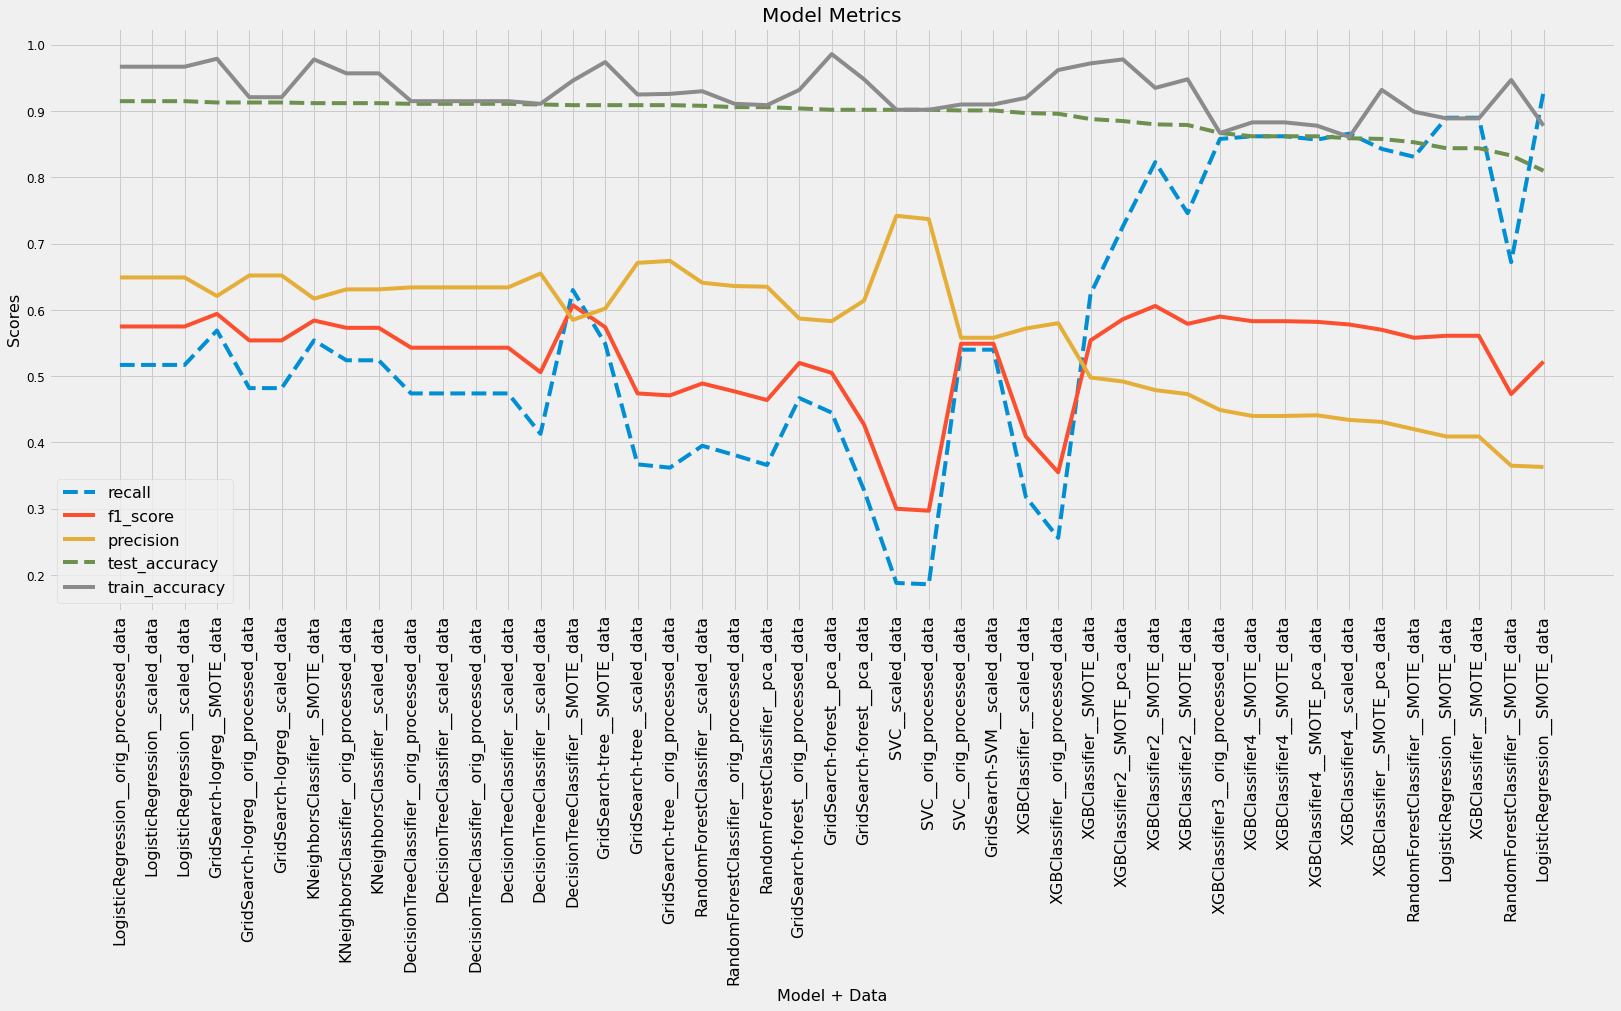

In [220]:
# plot the performance metrics for all of our models in one graph
plt.figure(figsize=(25, 10))
ax = top_acc_recall.recall.plot(linestyle='--')
ax = top_acc_recall.f1_score.plot()
ax = top_acc_recall.precision.plot()
ax = top_acc_recall.test_accuracy.plot(linestyle='--')
ax = top_acc_recall.train_accuracy.plot()
ax.set_xticks(top_acc_recall.index)
ax.set_xticklabels(top_models.model + '__' + top_acc_recall.data, 
                   rotation=90, fontsize=16)

ax.legend(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Model Metrics', fontsize=20)
plt.xlabel('Model + Data', fontsize=16)
plt.ylabel('Scores', fontsize=16);

No Skill: ROC AUC=0.500
Forest: ROC AUC=0.942


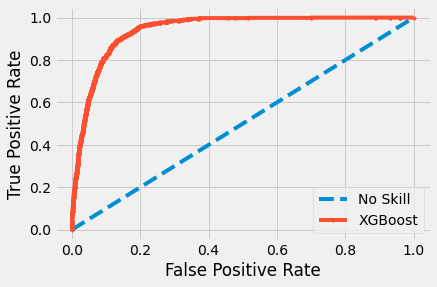

In [222]:
# xgb_clf4 - best parameters for XGBoost on SMOTE data

# establish baseline 'no skill' or 50/50 probability
ns_probs = [0 for _ in range(len(SMOTE_data['y_test']))]
# store the probability for the logreg model
xgb_probs = xgb_clf4.predict_proba(SMOTE_data['X_test'])

xgb_probs = xgb_probs[:,1]

ns_auc = roc_auc_score(SMOTE_data['y_test'], ns_probs)
xgb_auc = roc_auc_score(SMOTE_data['y_test'], xgb_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Forest: ROC AUC=%.3f' % (xgb_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(SMOTE_data['y_test'], ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(SMOTE_data['y_test'], xgb_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [228]:
# re-establish the forest model with the best performing parameters for F1
forest = RandomForestClassifier(criterion='gini', 
                                max_depth=12, 
                                min_samples_leaf= 3,
                                min_samples_split= 25,
                                n_estimators= 100 )

forest.fit(SMOTE_data['X_train'], SMOTE_data['y_train'])

forest_cm = confusion_matrix(SMOTE_data['y_test'], 
                             forest.predict(SMOTE_data['X_test']))

print(forest_cm)

[[6553  764]
 [ 181  740]]


No Skill: ROC AUC=0.500
Forest: ROC AUC=0.937


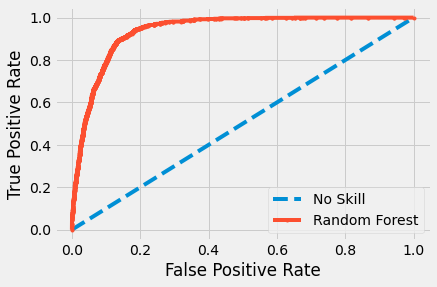

In [229]:
# forest - best parameters for Random Forest on SMOTE data

# establish baseline 'no skill' or 50/50 probability
ns_probs = [0 for _ in range(len(SMOTE_data['y_test']))]
# store the probability for the logreg model
rf_probs = forest.predict_proba(SMOTE_data['X_test'])

rf_probs = rf_probs[:,1]

ns_auc = roc_auc_score(SMOTE_data['y_test'], ns_probs)
rf_auc = roc_auc_score(SMOTE_data['y_test'], rf_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Forest: ROC AUC=%.3f' % (rf_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(SMOTE_data['y_test'], ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(SMOTE_data['y_test'], rf_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Implementation of XGBoost from a Business Perspective
With a threshold of 0.50, we are yielding a recall of 0.572 (527 out of 921). This means that we missing out on 394 cases where we predicted No, but in actuality it is Yes.  
* So if we lower the threshold, we can avoid missing out on these potential customers.  We are already doing pretty well on precision/recall for class 0,
* So it wouldn't hurt the business to call a few more leads assuming the "expected cost" < "expected revenue" per customer

In [147]:
# We can adjust the thresholds to influence the prediction output for the positive class
i=2
d=modeling_dataset[i]

xgb_pred = xgb_clf4.predict_proba(d['X_test'])
xgb_pred = np.where(xgb_pred > 0.1, 1, 0) #lower threshold from 0.5 to 0.05

report = classification_report(d['y_test'], xgb_pred[:,1])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7317
           1       0.41      0.92      0.57       921

    accuracy                           0.85      8238
   macro avg       0.70      0.88      0.74      8238
weighted avg       0.92      0.85      0.87      8238



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

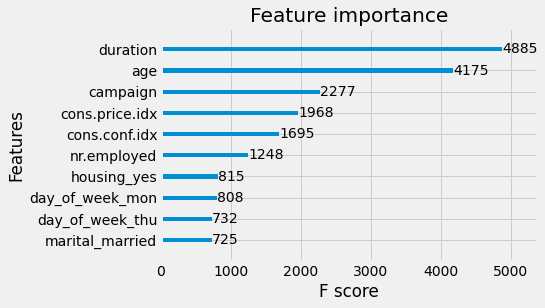

In [233]:
#plot feature importances
xgb.plot_importance(xgb_clf4, max_num_features = 10)

In [149]:
#getting names of columns
feature_columns = list(d['X_test'].columns.values)

### Preparing SHAP

Before doing some financial modeling, let's first understand the driving relationships with our XGBoost model using SHAP (SHapley Additive exPlanations). To put it simply, SHAP is a mathematical method based on the concepts of game theory and can be used to explain the predictions of any machine learning model by calculating the contribution of each feature to the prediction.

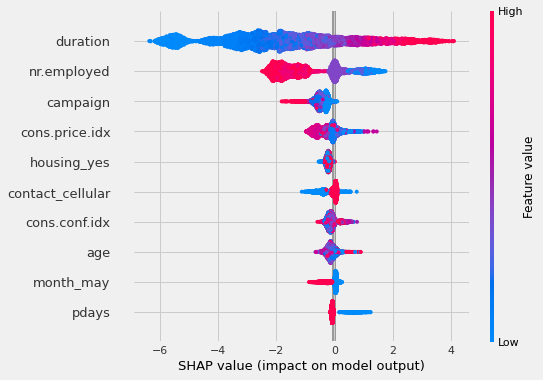

In [150]:
#pip install shap
#conda install -c conda-forge shap
import shap
explainer = shap.TreeExplainer(xgb_clf4)
shap_values = explainer.shap_values(d['X_test'])

#shap plotting
shap.summary_plot(shap_values,
                  d['X_test'],
                  feature_names = feature_columns,
                  max_display = 10)

#### Insights
* `Duration` is positively correlated with success outcomes, meaning if a customer was contacted previously and the duration of that call was relatively high, it was associated with the customer signing up for the product.
* `nr.employed` is negatively correlated with sucess outcomes, meaning if the quarterly economic indicator is relatively higher at the time of call, it was associated with the customer declining the product.
* `campaign` is also negatively correlated with success outcomes, meaning the number of times a lead was contacted, the more likely the product offering was declined.  We would probabably have to validate this further with customer surveys to validate this; we essentially do not want to annoy potential customers because of spamming behavior.

### Data Analysis
#### Average Revenue and Telemarketing Cost per Customer for Checking Account Services

In order to assess the business impact of our model, we need to lay down some assumptions:
1. We can expect about \$1650 per checking customer per year
2. The average telemarketing cost is between \$25 to \$50 per hour
3. The average outbound calls a sales person will make is 10 calls per hour, or 6 min per call

Sources:
1. https://www.bankdirector.com/issues/the-profitability-of-the-average-checking-account
2. https://www.costowl.com/b2b/marketing-telemarketing-services-cost.html
3. https://www.prosalesconnection.com/blog/2011/07/06/how-many-cold-calls-per-hour-should-i-make

In [309]:
# print the average number of calls per customer, and avg call per successful/unsuccessful customers

avg_n_call = round(df.campaign.mean(), 0)
avg_n_yes_call = round(df[df["y"] == "yes"].campaign.mean(), 0)
avg_n_no_call = round(df[df["y"] == "no"].campaign.mean(), 0)

print(f'The average number of times a custmer was called was: {avg_n_call}')
print(f'The average calls for a succesful customer were: {avg_n_yes_call}')
print(f'The average calls for an unsuccesful customer were: {avg_n_no_call}')

The average number of times a custmer was called was: 3.0
The average calls for a succesful customer were: 2.0
The average calls for an unsuccesful customer were: 3.0


In [310]:
# Determine number of calls made
# Input: number of customers, success rate, yes_calls, no_calls
# Output: nbr_successful_calls and nbr_unsuccessful_calls

def n_calls_made(n_customers, success_rate=.11, yes_calls=2, no_calls=3, show= True): 
    yes_customers = n_customers * success_rate
    no_customers = n_customers - yes_customers
    
    total_yes_calls = yes_customers * yes_calls
    total_no_calls = no_customers * no_calls
    all_calls = total_yes_calls + total_no_calls
    
    y_call_share = round(total_yes_calls/all_calls, 3)
    n_call_share = 1 - y_call_share
    
    if show == True: 
        print(f'Given a {success_rate*100}% success rate:')
        print(f'\t * {total_yes_calls} calls would be made to succesful customers')
        print(f'\t * this represents {y_call_share*100}% of all calls \n')
        print(f'\t * {total_no_calls} calls would be made to unsuccesful customers')
        print(f'\t * this represents {n_call_share*100}% of all calls \n')

    return y_call_share, n_call_share, all_calls

In [311]:
# estimate the number of calls made based on our observed data
n_customers = 200000
n_calls_made(n_customers)

Given a 11.0% success rate:
	 * 44000.0 calls would be made to succesful customers
	 * this represents 7.6% of all calls 

	 * 534000.0 calls would be made to unsuccesful customers
	 * this represents 92.4% of all calls 



(0.076, 0.924, 578000.0)

#### Observations:

* Based on our current observations we would make 578,000 calls to customers in a 200,000 person campaign
* Only 7.6% if of those calls would be toward successful customers
* 92.4% of calls would go toward unproductive customers

This seems like a lot of wasted effort. One application of our predictive model is to determine which customers should not receive a repeat call if they were unlikely to subscribe so we can limit them to 1 call.

In [312]:
# estimate the total number of calls if we were to optimize the lower-likelhood customers to a single call
n_calls_made(n_customers, yes_calls=2, no_calls=1)

Given a 11.0% success rate:
	 * 44000.0 calls would be made to succesful customers
	 * this represents 19.8% of all calls 

	 * 178000.0 calls would be made to unsuccesful customers
	 * this represents 80.2% of all calls 



(0.198, 0.802, 222000.0)

#### Observations:

* Based on this estimation we would make about 356,000 fewer calls
* 19.8% of calls would go toward productive customers
* 80.2% of calls would go to unproductive customers, a potential 12% increase in efficiency
This strategy could improve overall efficiency. To put it in perspective, let's see if we can estimate total cost savings. We'll first have to figure out what the cost of a single campaign would be.

We'll make a function that takes in the following previously stated assumptions:
* Average duration per call is 6 min
* The lower and upper hourly cost estimates are \$25 and \$50
* Successful customers would be called 2 times
* Unsuccessful customers would be called 3 times

In [313]:
# Create a function that estimates the total cost of a campaign
# Input: number of customers per campaign
# Output: low total cost, high total cost
def cost_of_campaign(n_customers, avg_call_min=6, y_calls=2, n_calls=3):
    
    t_n_calls= n_calls_made(n_customers,
                          yes_calls=y_calls,
                          no_calls=n_calls,
                          show=False)[2]

    low_cost = 25
    high_cost = 50

    total_l_cost = round((t_n_calls*avg_call_min)/60 * low_cost, 2)        
    total_h_cost = round((t_n_calls*avg_call_min)/60 * high_cost, 2) 

    return total_h_cost, total_l_cost

In [329]:
# estimate total cost of a campaign using baseline approach
n_customers = 200000
total_h_cost, total_l_cost = cost_of_campaign(n_customers)

print(f'The total cost of a {n_customers} customer campaign, at 6 min a call, is between: ')
print(f'\t * High: ${total_h_cost}')
print(f'\t * Low: ${total_l_cost}')

The total cost of a 200000 customer campaign, at 6 min a call, is between: 
	 * High: $2890000.0
	 * Low: $1445000.0


In [330]:
# estimate total cost of a campaign using optimal approach
n_customers = 200000
total_h_cost_opt, total_l_cost_opt = cost_of_campaign(n_customers,
                                             y_calls=2,
                                             n_calls=1)

print(f'The total cost of a {n_customers} customer campaign, at 6 min a call, is between: ')
print(f'\t * High: ${total_h_cost_opt}')
print(f'\t * Low: ${total_l_cost_opt}')

The total cost of a 200000 customer campaign, at 6 min a call, is between: 
	 * High: $1110000.0
	 * Low: $555000.0


#### Observations:
* The campaign using the baseline approach will cost us \$1.4 million to \$2.9 million.
* The campaign using the optimal approach will cost us \$0.5 million to \$1.1 million.
* The optiized approach could save up to 62%
    - $0.9 million to \$1.8 million in savings for a 200K person campaign
    - This seems significant, but let's take the performance of the model into account in order to verify this

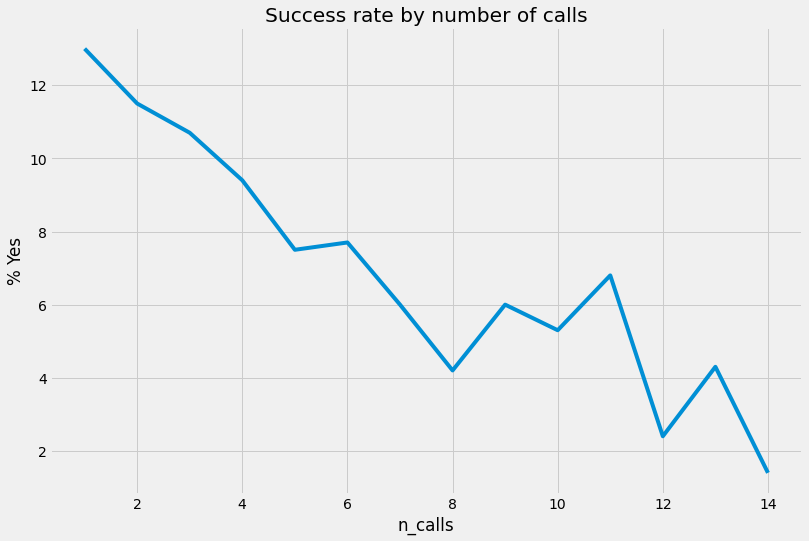

[13.0, 11.5, 10.7, 9.4, 7.5, 7.7, 6.0, 4.2, 6.0, 5.3, 6.800000000000001, 2.4, 4.3, 1.4000000000000001]


In [316]:
# plot the % of sucess outcomes by number of calls
success_rates = []
for i in range (1, 15):
    rate = round(data_w_dummies[data_w_dummies['campaign'] == i].y_yes.mean(), 3)*100
    success_rates.append(rate)

plt.figure(figsize=(12,8))    
sns.lineplot(x=range(1, 15), y=success_rates)
plt.title('Success rate by number of calls')
plt.ylabel('% Yes')
plt.xlabel('n_calls')
plt.show()

print(success_rates)

#### Observations:
* The diminishing return on the number calls made in relation to success rates is evident
* But not a good idea to reduce overall calls because we could potentially miss out successful outcomes, hence missed revenue opportunities, so this translates to a profitability optimization problem

### Modeling an optimal solution
To optimize profitability, let's make a few assumptions:

1. In any campaign we will call all customers at least one time
    * Prioritize higher potential customers with a second call
2. Our success rate of 11% applies to any sample of potential customers
    * Recall multiplied by the success rate outputs expected True Positives and False Negatives
    * Precision will determine how many total positive predictions that were actually positive
3. False Positives will be calls that should not exceed 1
4. False Negatives will be calls that resulted in a successful outcome, or missed revenue
5. Potential savings should exceed missed revenue due to our False Negative Rate
    * We'll attempt to account for 1-call success by applying the success rate to our False Negatives

As a first step, let's determine what our expected baseline revenue.

In [331]:
# set the success rate and revenue per customer assumptions
success_rate = .11
rev_p_cust = 1650

# calculate the number of 'yes' customers we can expect based on the success rate
n_y_customers = round(n_customers * success_rate, 0)

# calculate baseline revenue we can expect based on succes rate and rev per customer
baseline_revenue = n_customers * success_rate * rev_p_cust

print(f'In a {n_customers} person campaign we can expect ${baseline_revenue} revenue' )
print(f'At a 11% success rate we can expect our campaign to yield {n_y_customers} customers')

In a 200000 person campaign we can expect $36300000.0 revenue
At a 11% success rate we can expect our campaign to yield 22000.0 customers


* If we convert 11% of potential customers, we can expect \$36.3 million in revenue, and gained 22,000 customers
* The baseline costs of the campaign is between \$1.4 million and \$2.9 million

In [332]:
# Define formula that predicts TP, FN and total positives
# Input: number of yes customers, trained model, data
# Output: expected nbr of TP, expected nbr of TN, predicted nbr of positives

def predicted_values(n_y_customers, model, data):
    
    y_test = data['y_test']
    X_test = data['X_test']
    preds = model.predict(X_test)
    
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    
    est_T_positive = round(n_y_customers * recall, 0)
    est_F_negative = n_y_customers - est_T_positive
    total_pos = round(est_T_positive/precision, 0)
    
    return est_T_positive, est_F_negative, total_pos

In [333]:
# Define formula that predicts TP, FN and total positives
# Input: number of yes customers, trained model, data
# Output: expected nbr of TP, expected nbr of TN, predicted nbr of positives

def predicted_values(n_y_customers, model, data, threshold=0.5):
    
    y_test = data['y_test']
    X_test = data['X_test']
    
    #preds = model.predict_proba(X_test) #default 0.5 threshold
    preds = (model.predict_proba(X_test)[:,1] >= threshold).astype(bool) # set threshold
    
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    
    est_T_positive = round(n_y_customers * recall, 0)
    est_F_negative = n_y_customers - est_T_positive
    total_pos = round(est_T_positive/precision, 0)
    
    return est_T_positive, est_F_negative, total_pos

In [334]:
# apply the predicted_values function to the xgb_clf4 model at 0.5 threshold
xgb_true_pos, xgb_false_neg, xgb_total = predicted_values(n_y_customers, 
                                                       xgb_clf4, 
                                                       SMOTE_data)

print('For a 200,000 person campaign with an assumed 11% success_rate, our XGBoost model:')
print(f'\t * would predict {xgb_total} total positives')
print(f'\t * of those positives, {xgb_true_pos} would actually convert')
print(f'\t * the model would likely miss up to {xgb_false_neg} prospects who would have converted')

For a 200,000 person campaign with an assumed 11% success_rate, our XGBoost model:
	 * would predict 20161.0 total positives
	 * of those positives, 12517.0 would actually convert
	 * the model would likely miss up to 9483.0 prospects who would have converted


In [335]:
# based on the number of predicted positives, calculate the number of calls
# that would be made and determine the high and low costs
xgb_campaign_h = sum([cost_of_campaign(n_customers, y_calls=1, n_calls=1)[0], 
                   cost_of_campaign(n_customers=xgb_total, y_calls=1, n_calls=1)[0]])

xgb_campaign_l = sum([cost_of_campaign(n_customers, y_calls=1, n_calls=1)[1], 
                   cost_of_campaign(n_customers=xgb_total, y_calls=1, n_calls=1)[1]])

xgb_campaign_h, xgb_campaign_l

(1100805.0, 550402.5)

In [336]:
# calculate and show the potential cost savings acheived by implemeting the model
print(f'On the high end, the XGBoost model may save us up to ${total_h_cost - xgb_campaign_h}')
print(f'On the low end as much as ${total_l_cost - xgb_campaign_l}')

On the high end, the XGBoost model may save us up to $1789195.0
On the low end as much as $894597.5


In [337]:
# calculate and show the potential difference in revenue gained by implementing the model
xgb_revenue = (xgb_true_pos + (xgb_false_neg * .11)) * rev_p_cust

print('Baseline Revenue: $', baseline_revenue)
print('XGBoost Revenue: $', xgb_revenue)
print('Difference: $', xgb_revenue - baseline_revenue)

Baseline Revenue: $ 36300000.0
XGBoost Revenue: $ 22374214.5
Difference: $ -13925785.5


Now let's rerun the model with a lower threshold so we can reduce the number of false negatives

In [340]:
# apply the predicted_values function to the xgb_clf4 model at 0.1 threshold
xgb_true_pos, xgb_false_neg, xgb_total = predicted_values(n_y_customers, 
                                                       xgb_clf4, 
                                                       SMOTE_data, 0.1)

print('For a 200,000 person campaign with an assumed 11% success_rate, our XGBoost model:')
print(f'\t * would predict {xgb_total} total positives')
print(f'\t * of those positives, {xgb_true_pos} would actually convert')
print(f'\t * the model would likely miss up to {xgb_false_neg} prospects who would have converted')

For a 200,000 person campaign with an assumed 11% success_rate, our XGBoost model:
	 * would predict 48944.0 total positives
	 * of those positives, 20232.0 would actually convert
	 * the model would likely miss up to 1768.0 prospects who would have converted


In [341]:
# based on the number of predicted positives, calculate the number of calls
# that would be made and determine the high and low costs
xgb_campaign_h = sum([cost_of_campaign(n_customers, y_calls=1, n_calls=1)[0], 
                   cost_of_campaign(n_customers=xgb_total, y_calls=1, n_calls=1)[0]])

xgb_campaign_l = sum([cost_of_campaign(n_customers, y_calls=1, n_calls=1)[1], 
                   cost_of_campaign(n_customers=xgb_total, y_calls=1, n_calls=1)[1]])

xgb_campaign_h, xgb_campaign_l

(1244720.0, 622360.0)

In [342]:
# calculate and show the potential cost savings acheived by implementing the model
print(f'On the high end, the XGBoost model may save us up to ${total_h_cost - xgb_campaign_h}')
print(f'On the low end as much as ${total_l_cost - xgb_campaign_l}')

On the high end, the XGBoost model may save us up to $1645280.0
On the low end as much as $822640.0


In [343]:
print(total_h_cost)
print(total_l_cost)

2890000.0
1445000.0


In [344]:
# calculate and show the potential difference in revenue gained by implementing the model
xgb_revenue = (xgb_true_pos + (xgb_false_neg * .11)) * rev_p_cust

print('Baseline Revenue: $', baseline_revenue)
print('XGBoost Revenue: $', xgb_revenue)
print('Difference: $', xgb_revenue - baseline_revenue)

Baseline Revenue: $ 36300000.0
XGBoost Revenue: $ 33703692.0
Difference: $ -2596308.0


## Conclusion

* By adjusting the binary threshold, we can influence potential revenue and cost savings


* Total revenue comparison:
    - The baseline expected revenue is as high as \$36.3 million
    - The xgboost model at 0.5 threshold would generate up to \$22.4 million (38% lower than baseline)
    - The xgboost model at 0.1 threshold would generate up to \$33.7 million (7% lower than baseline)


* Total cost comparison:
    - Our baseline expected campaign cost is as much as \$2.9 million
    - The xgboost model at 0.5 threshold could save up to \$1.8 million (62% lower than baseline)
    - The xgboost model at 0.1 threshold could save up to \$1.6 million (57% lower than baseline)
    
* Implementing XGBoost with a lower binary threshold of 0.1 would be my optimal choice for this problem:
    - We can significantly <b>reduce costs by nearly 57%</b> without losing out so much on potential revenue
        - only a <b>7% reduction from baseline revenue</b>
    - We also minimize the hidden risk of annoying potential future customers by not spamming them as much

